# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

# CODE

## EDA

In [98]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [100]:
# passing parameter to the function
df = pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
df = df.drop(columns="Loan_ID")
# removing useless feature (loan id)

In [104]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [106]:
print(f"===TRAINING DATA=== \ndf shape: {df.shape}, \n{df.isnull().sum()}, \nTotal Missing Values: {df.isnull().sum().sum()}")

===TRAINING DATA=== 
df shape: (614, 12), 
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64, 
Total Missing Values: 149


In [108]:
df_test = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv")
df_test = df_test.drop(columns="Loan_ID")
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [110]:
print(f"===TESTING DATA=== \ndf shape: {df_test.shape}, \n{df_test.isnull().sum()}, \nTotal Missing Values: {df_test.isnull().sum().sum()}")

===TESTING DATA=== 
df shape: (367, 11), 
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64, 
Total Missing Values: 84


In [112]:
# Check data types of features
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test = df_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

label_encoders_test = {}
for col in categorical_cols_test:
    le_test = LabelEncoder()
    df_test[col] = le_test.fit_transform(df_test[col])
    label_encoders_test[col] = le_test


# Check data types of features
numerical_cols_new = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols_new = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test_new = df_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test_new = df_test.select_dtypes(include=['object', 'category']).columns.tolist()

print("LABEL ENCODING\n")
print("===TRAINING DATA===")
print(f"Categorical Columns Before: {categorical_cols} \nCategorical Colums After: {categorical_cols_new}")
print(f"Numerical Columns Before: {numerical_cols} \nCategorical Colums After: {numerical_cols_new}")

print("\n===TESTING DATA===")
print(f"Categorical Columns Before: {categorical_cols_test} \nCategorical Colums After: {categorical_cols_test_new}")
print(f"Numerical Columns Before: {numerical_cols_test} \nCategorical Colums After: {numerical_cols_test_new}")


LABEL ENCODING

===TRAINING DATA===
Categorical Columns Before: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

===TESTING DATA===
Categorical Columns Before: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Proper

<Figure size 2000x3000 with 0 Axes>

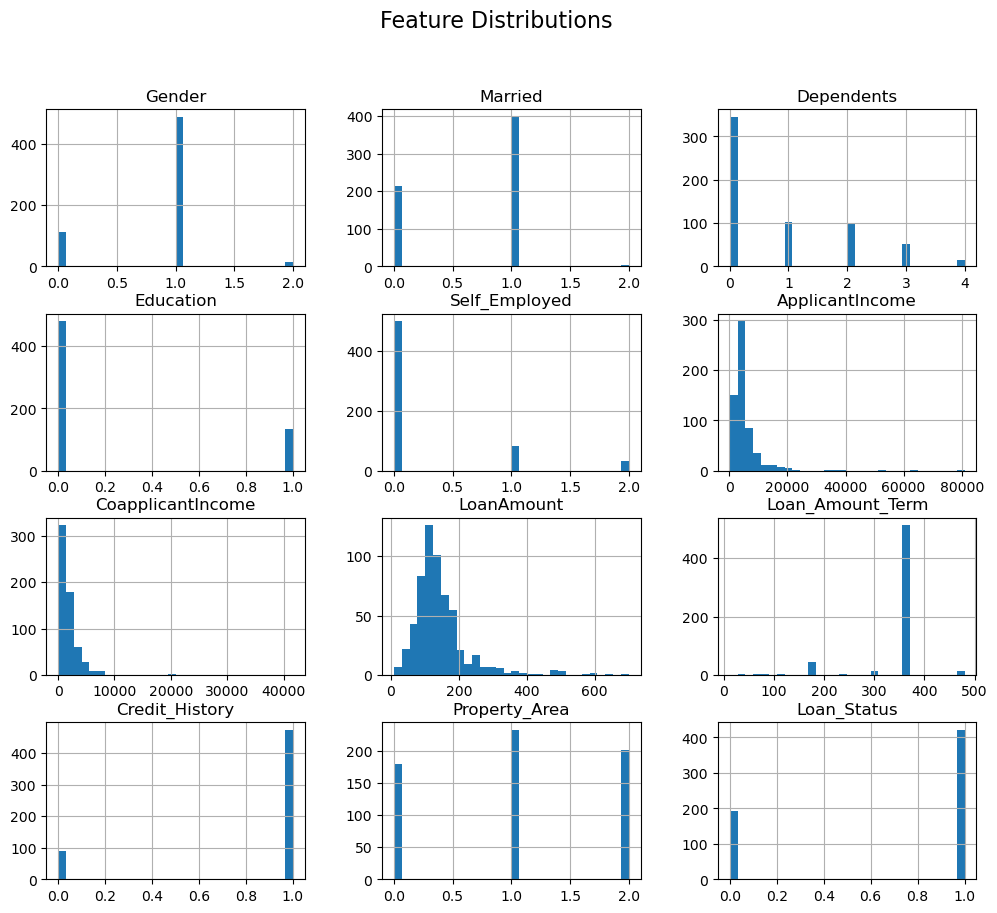

In [114]:
# Feature distributions
plt.figure(figsize=(20, 30))
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

Here the data is having null values, and hence showing 3 values instead of 2 in Gender, Married Status and Self Employed column. We can handle this data with following different methods:

1. Drop Rows with NaN
2. Fill NaN Values
-    i. Fill with Mode (Most Frequent Value)
-   ii. Create a Separate Category for NaN ("Unknown")
-  iii. Use Predictive Imputation (KNN Multivariate Imputer)

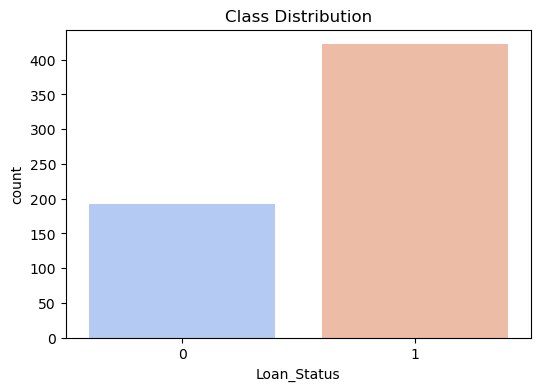

In [91]:
# Visualize class distribution
target_col = "Loan_Status"
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col, hue=target_col, palette='coolwarm', legend=False)
plt.title('Class Distribution')
plt.show()


## DATA PREPROCESSING (REMOVING OR FILLING NULL VALUES)

### 1) Drop Rows with NaN Values

In [120]:
df_drop = df.copy()
df_drop = df_drop.dropna()
df_drop_test = df_test.copy()
df_drop_test = df_drop_test.dropna()

In [126]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_drop.shape}, {df_drop.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_drop_test.shape}, {df_drop_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (529, 12), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (328, 11), 0


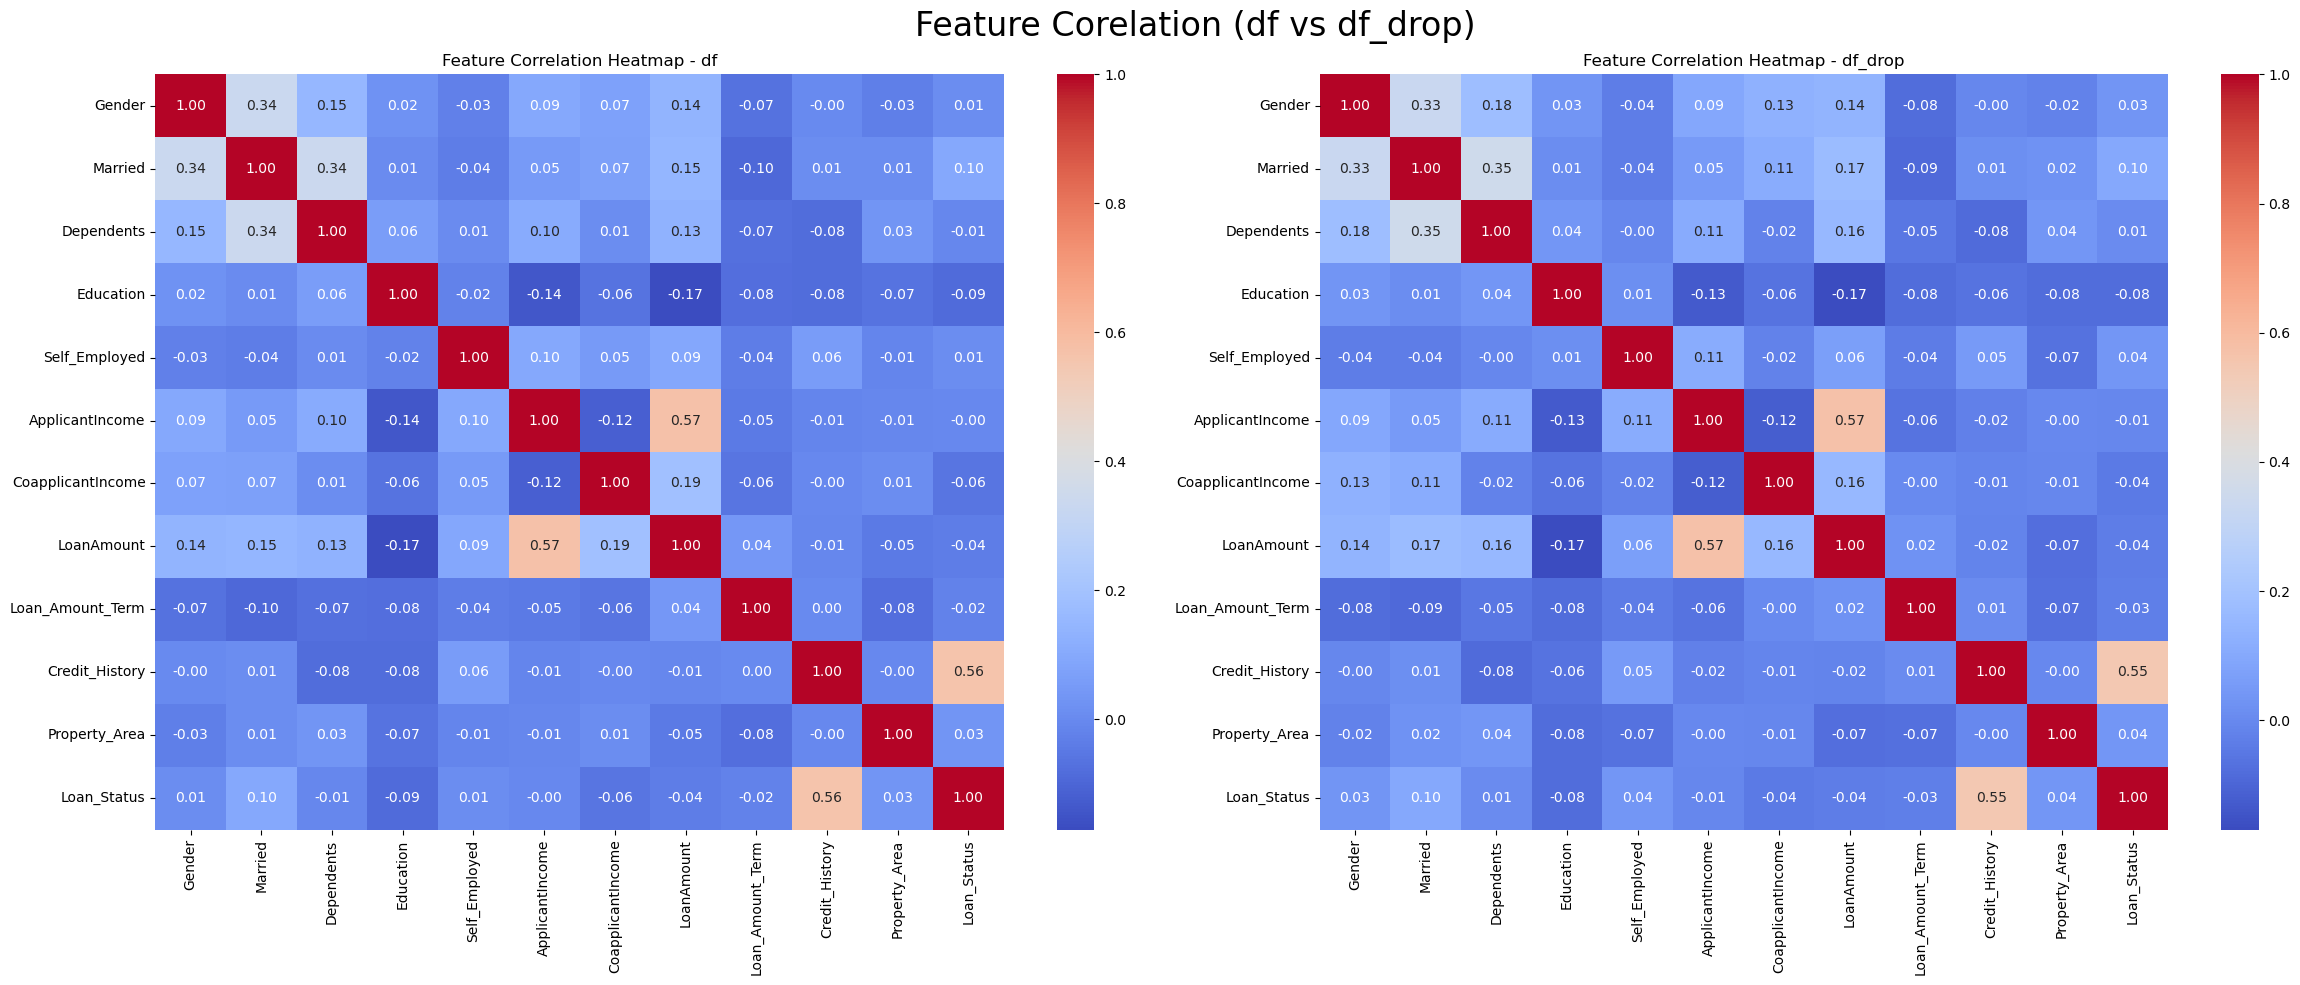

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_drop
sns.heatmap(df_drop.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_drop")

plt.suptitle("Feature Corelation (df vs df_drop)", fontsize=24)
plt.tight_layout()
plt.show()

### 2) Fill Nan Values (MODE)

In [130]:
df_filled = df.copy()
df_filled.fillna(df_filled.mode().iloc[0], inplace=True)
df_filled_test = df_test.copy()
df_filled_test.fillna(df_filled_test.mode().iloc[0], inplace=True)

In [132]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_filled.shape}, {df_filled.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_filled_test.shape}, {df_filled_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (614, 12), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (367, 11), 0


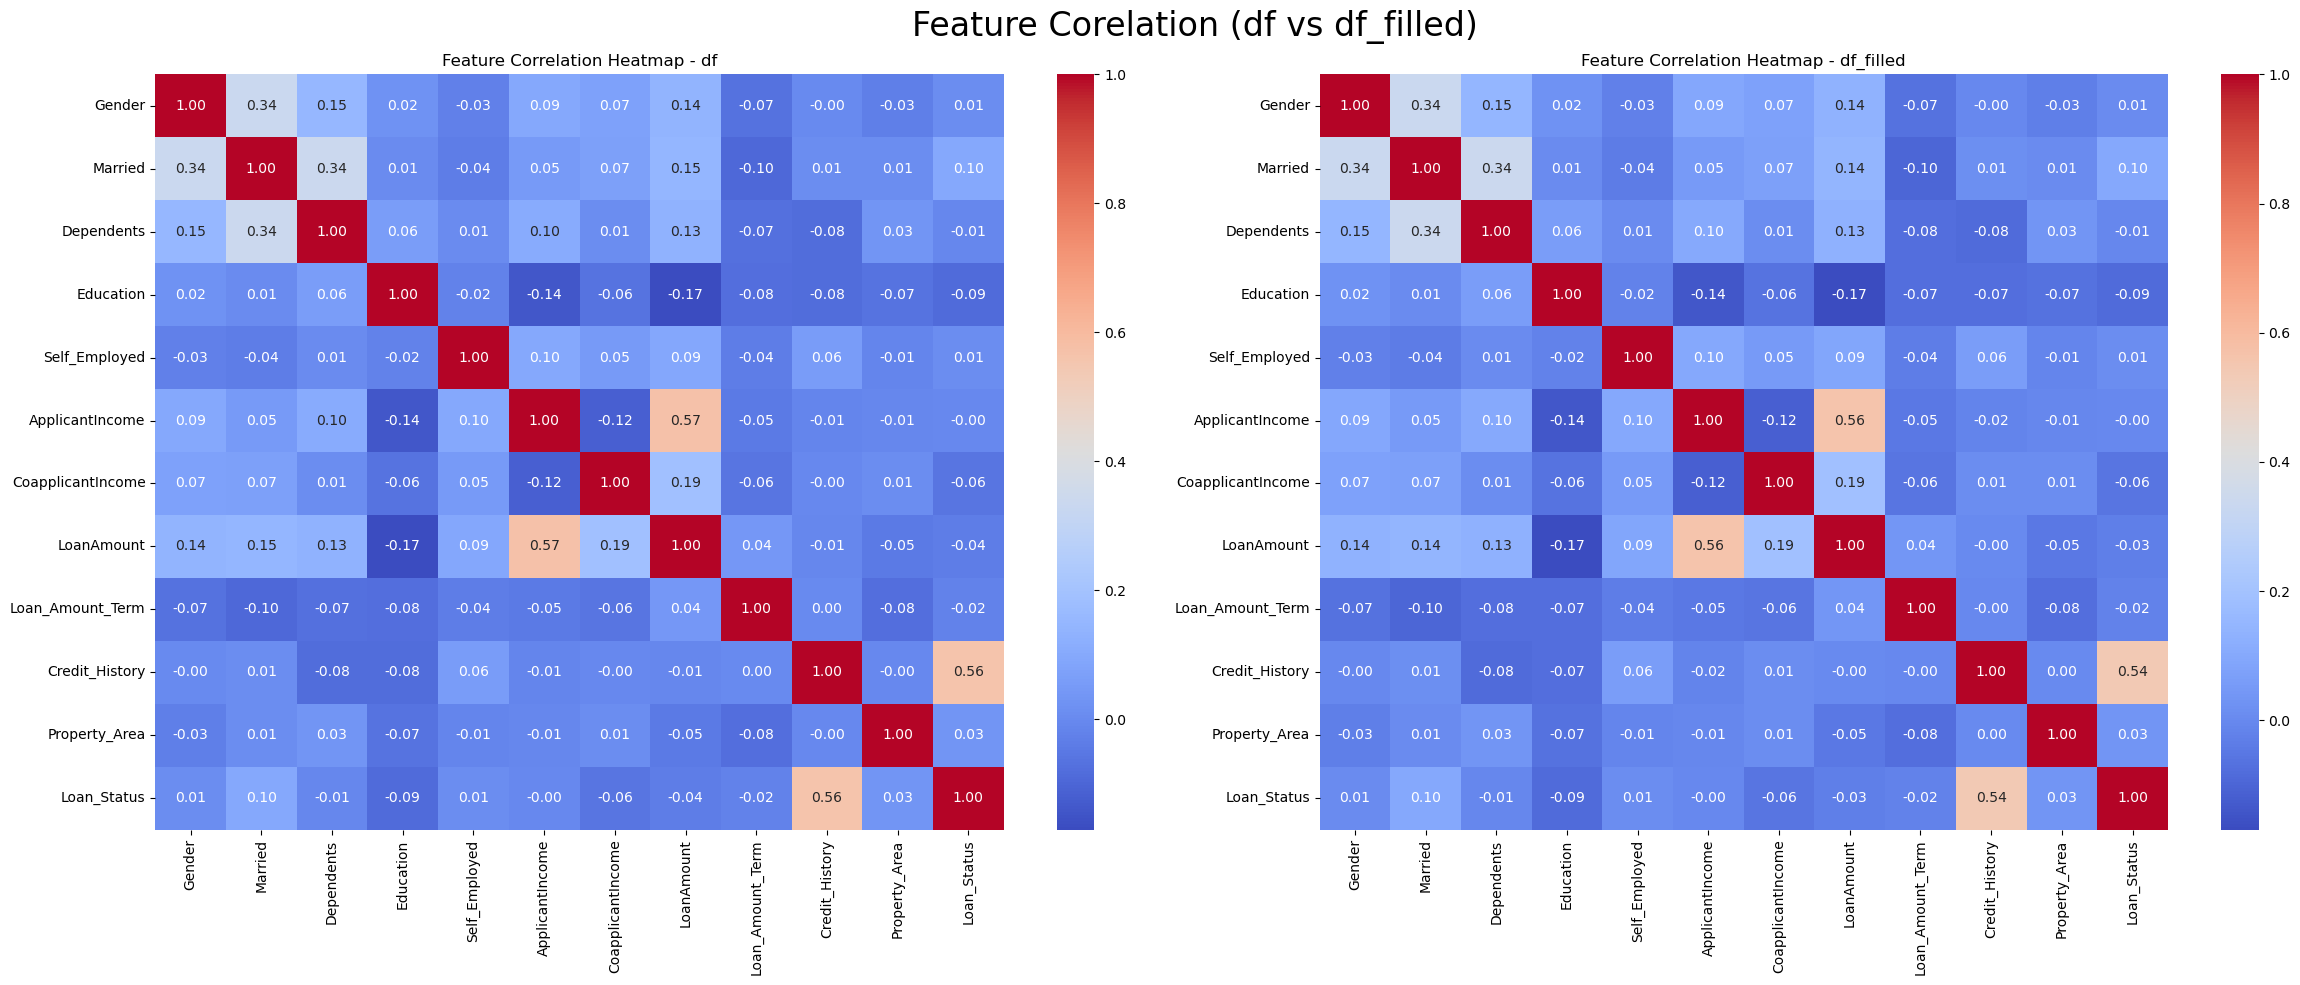

In [215]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_filled
sns.heatmap(df_filled.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_filled")

plt.suptitle("Feature Corelation (df vs df_filled)", fontsize=24)
plt.tight_layout()
plt.show()


### 3) Filling "Unknown" for all Categorial NaN values and Mean/Median for All Numerical NaN values

In [185]:
df_unknown = pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv")
df_unknown_test =  pd.read_csv(" https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv")

# TRAINING DATA MISSING VALUES

for col in df_unknown.select_dtypes(include=['object']):  # Select categorical columns
    df_unknown[col] = df_unknown[col].astype(str)  # Convert to string (fix float issue)
    df_unknown[col] = df_unknown[col].fillna("Unknown")  # Fill NaN with 'Unknown'

for col in df_unknown.select_dtypes(include=['number']):  # Loop through numerical columns
    if df_unknown[col].skew() > 1 or df_unknown[col].skew() < -1:  # If highly skewed, use median
        df_unknown[col] = df_unknown[col].fillna(df_unknown[col].median())
    else:
        df_unknown[col] = df_unknown[col].fillna(df_unknown[col].mean())  # Use mean for normal distribution
        
# TESTING DATA MISSING VALUES

for col in df_unknown_test.select_dtypes(include=['object']): 
    df_unknown_test[col] = df_unknown_test[col].astype(str) 
    df_unknown_test[col] = df_unknown_test[col].fillna("Unknown") 

for col in df_unknown_test.select_dtypes(include=['number']):  
    if df_unknown_test[col].skew() > 1 or df_unknown_test[col].skew() < -1: 
        df_unknown_test[col] = df_unknown_test[col].fillna(df_unknown_test[col].median())
    else:
        df_unknown_test[col] = df_unknown_test[col].fillna(df_unknown_test[col].mean()) 

In [189]:
# ENCODINGGG
numerical_cols = df_unknown.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_unknown.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test = df_unknown_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test = df_unknown_test.select_dtypes(include=['object', 'category']).columns.tolist()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_unknown[col] = le.fit_transform(df_unknown[col])
    label_encoders[col] = le

label_encoders_test = {}
for col in categorical_cols_test:
    le_test = LabelEncoder()
    df_unknown_test[col] = le_test.fit_transform(df_unknown_test[col])
    label_encoders_test[col] = le_test


# Check data types of features
numerical_cols_new = df_unknown.select_dtypes(include=['number']).columns.tolist()
categorical_cols_new = df_unknown.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols_test_new = df_unknown_test.select_dtypes(include=['number']).columns.tolist()
categorical_cols_test_new = df_unknown_test.select_dtypes(include=['object', 'category']).columns.tolist()

print("LABEL ENCODING\n")
print("===TRAINING DATA===")
print(f"Categorical Columns Before: {categorical_cols} \nCategorical Colums After: {categorical_cols_new}")
print(f"Numerical Columns Before: {numerical_cols} \nCategorical Colums After: {numerical_cols_new}")

print("\n===TESTING DATA===")
print(f"Categorical Columns Before: {categorical_cols_test} \nCategorical Colums After: {categorical_cols_test_new}")
print(f"Numerical Columns Before: {numerical_cols_test} \nCategorical Colums After: {numerical_cols_test_new}")


LABEL ENCODING

===TRAINING DATA===
Categorical Columns Before: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

===TESTING DATA===
Categorical Columns Before: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] 
Categorical Colums After: []
Numerical Columns Before: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'] 
Categorical Colums After: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', '

In [191]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_unknown.shape}, {df_unknown.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_filled_test.shape}, {df_filled_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (614, 13), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (367, 11), 0


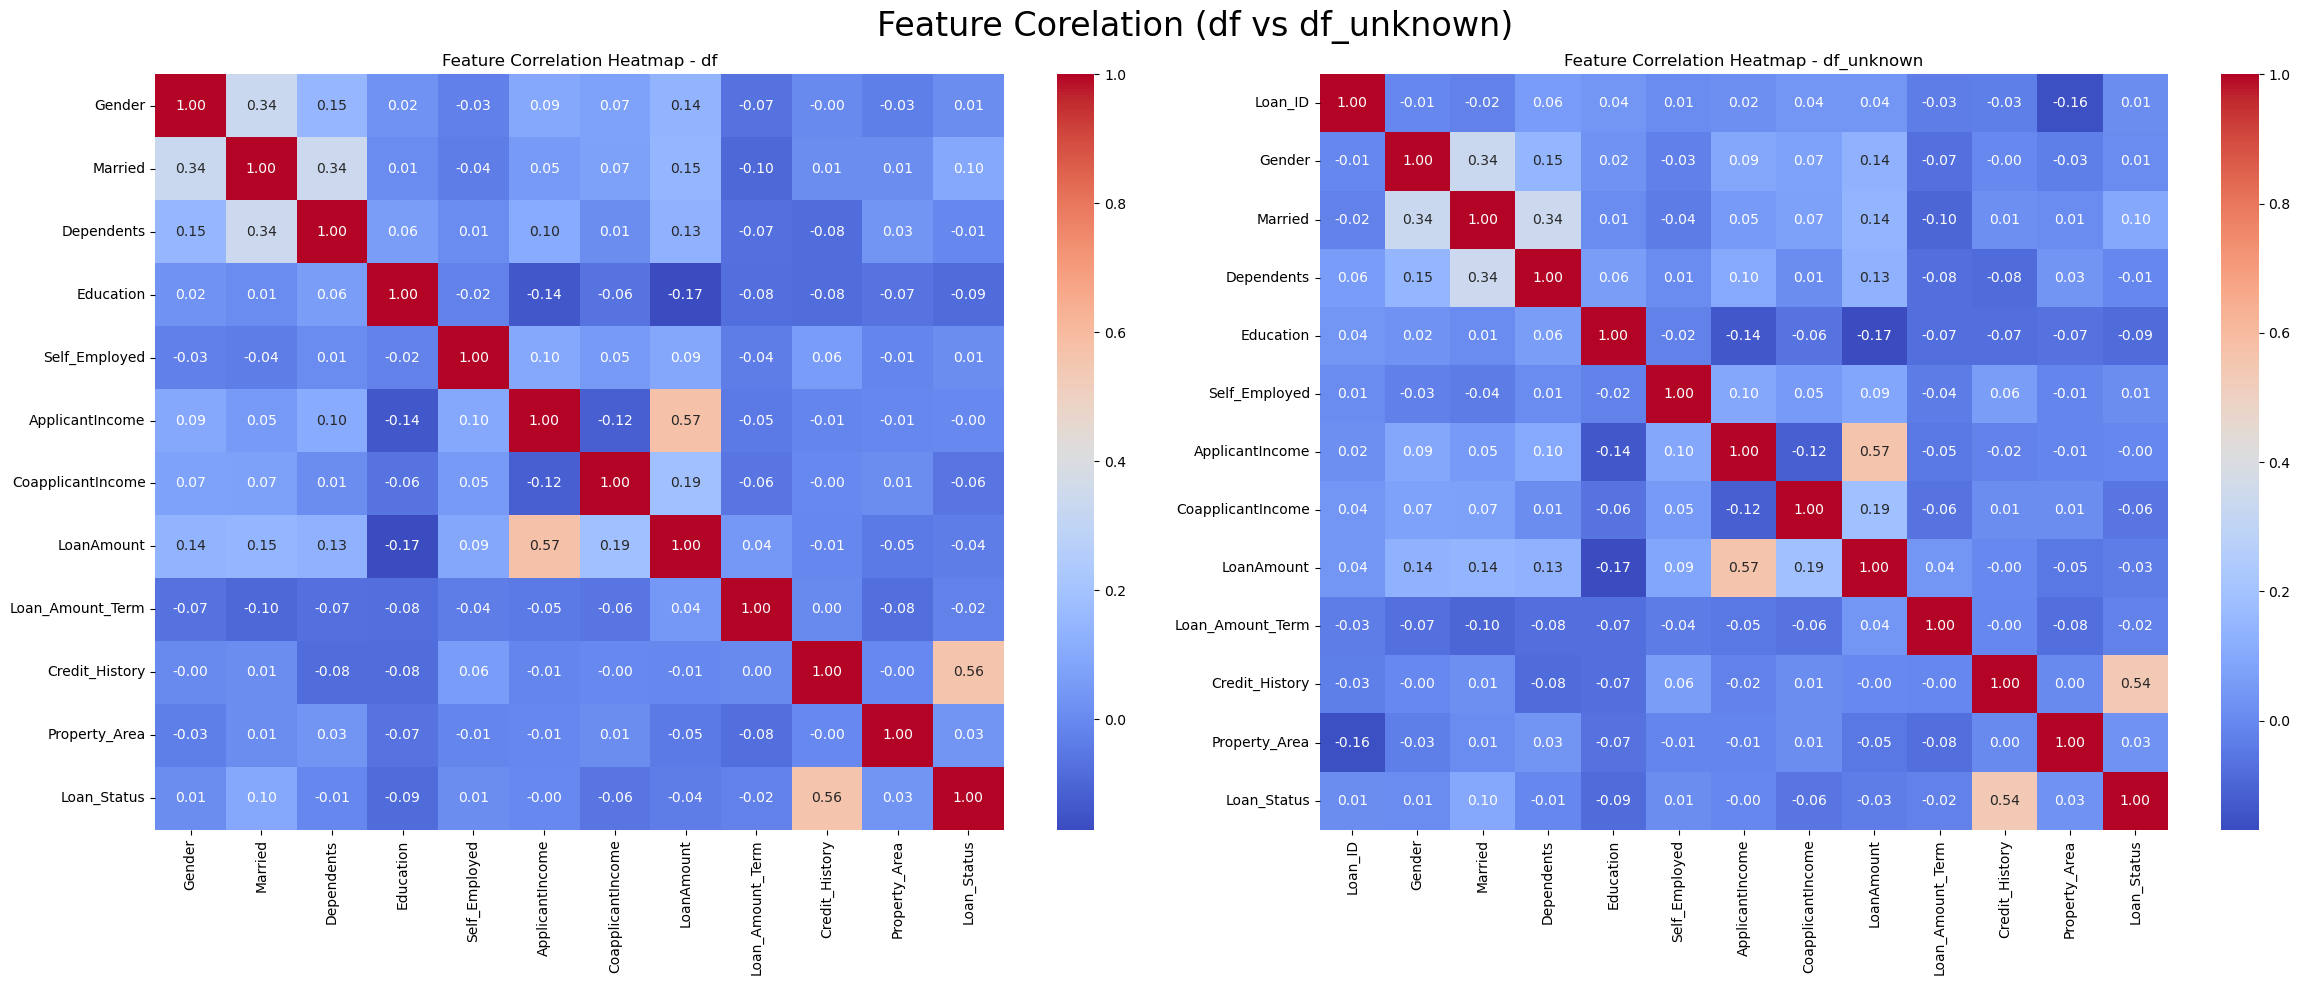

In [209]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_unknown
sns.heatmap(df_unknown.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_unknown")

plt.suptitle("Feature Corelation (df vs df_unknown)", fontsize=24)
plt.tight_layout()
plt.show()


### 4) Fill Nan with predictive Values (KNN IMPUTER)

In [199]:
from sklearn.impute import KNNImputer
df_multi_imputer = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer)

df_multi_imputer_test = df_test.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer_test.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer_test)

In [201]:
print("===TRAINING DATA===")
print(f"Table Before: {df.shape}, {df.isnull().sum().sum()} \n Table After: {df_multi_imputer.shape}, {df_multi_imputer.isnull().sum().sum()}")
print("\n===TESTING DATA===")
print(f"Table Before: {df_test.shape}, {df_test.isnull().sum().sum()} \n Table After: {df_multi_imputer_test.shape}, {df_multi_imputer_test.isnull().sum().sum()}")

===TRAINING DATA===
Table Before: (614, 12), 86 
 Table After: (614, 12), 0

===TESTING DATA===
Table Before: (367, 11), 40 
 Table After: (367, 11), 0


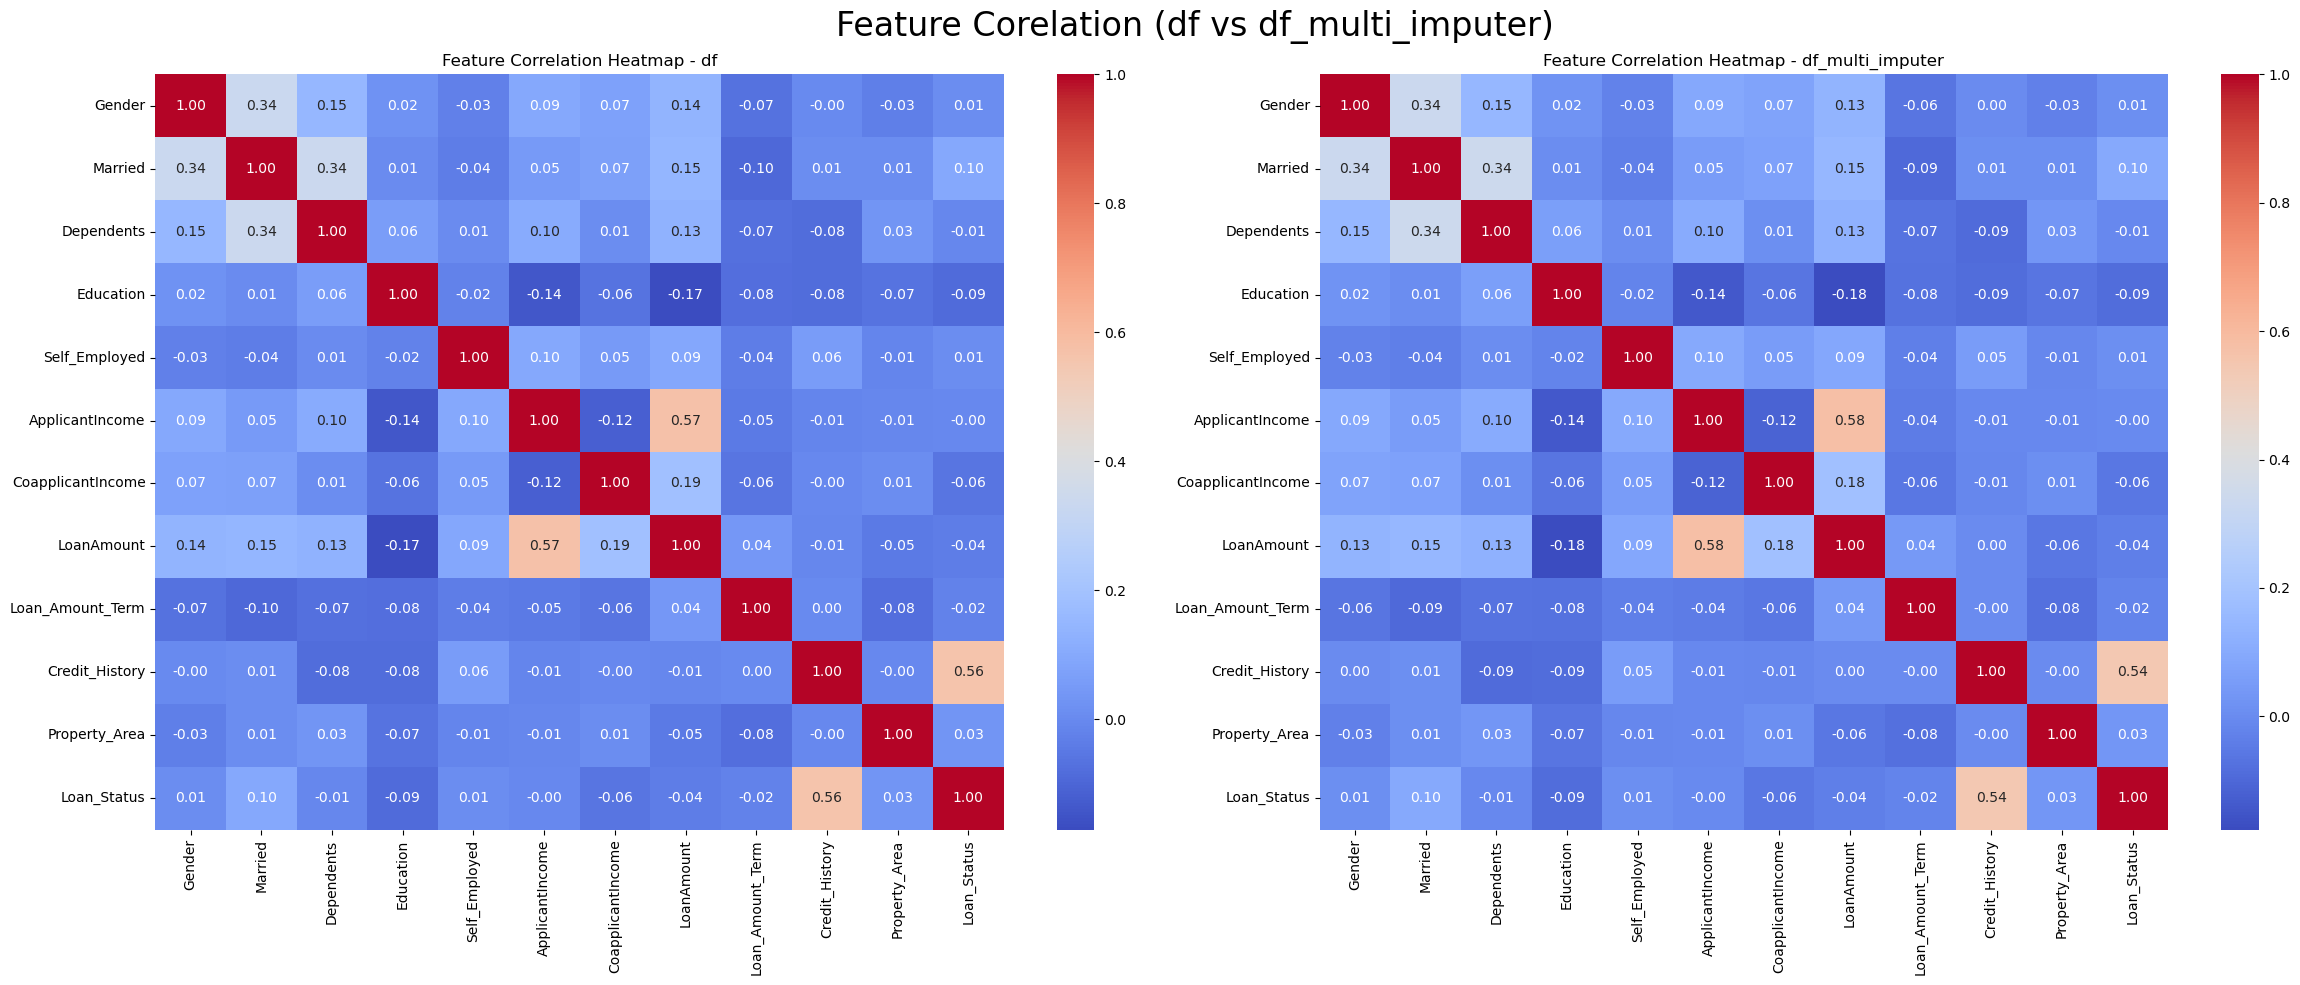

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_multi_imputer
sns.heatmap(df_multi_imputer.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_multi_imputer")

plt.suptitle("Feature Corelation (df vs df_multi_imputer)", fontsize=24)
plt.tight_layout()
plt.show()


## TRAINING THE MODEL

In [284]:
# Define models and hyperparameters
models = {
    'Decision Tree': (DecisionTreeClassifier(random_state=17), {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(random_state=17), {'C': [0.1, 1, 10], 'max_iter': [100, 200]}),
    'SVM': (SVC(random_state=17), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Random Forest': (RandomForestClassifier(random_state=17), {'n_estimators': [50, 100], 'max_depth': [5, 10]}),
    'SGD': (SGDClassifier(random_state=17), {'alpha': [0.0001, 0.001], 'max_iter': [1000]}),
    'Naive Bayes': (GaussianNB(), {})
}
target_col = 'Loan_Status'

### 1) TRAINING: df_drop

In [290]:
results_drop = {}
trained_models_drop = {}

In [292]:
X_train = df_drop.drop(columns=[target_col])
y_train = df_drop[target_col]
X_test = df_drop_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (529, 11) 
X_test_scaled (328, 11) 
y_train(529,)


In [294]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_drop[model_name] = best_model
    joblib.dump(best_model, f'df_drop_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_drop[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 2.7520227432250977 seconds and tested in 0.010634660720825195 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.024802446365356445 seconds and tested in 0.010118722915649414 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.04313945770263672 seconds and tested in 0.007021665573120117 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.08964371681213379 seconds and tested in 0.01003718376159668 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.45129942893981934 seconds and tested in 0.0017428398132324219 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.021840572357177734 s

### 2) TRAINING: df_filled

In [245]:
results_filled = {}
trained_models_filled = {}

In [296]:
X_train = df_filled.drop(columns=[target_col])
y_train = df_filled[target_col]
X_test = df_filled_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (614, 11) 
X_test_scaled (367, 11) 
y_train(614,)


In [298]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_filled[model_name] = best_model
    joblib.dump(best_model, f'df_filled_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_filled[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.0386350154876709 seconds and tested in 0.004441738128662109 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.03989720344543457 seconds and tested in 0.01597738265991211 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.03688335418701172 seconds and tested in 0.00875997543334961 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.09995579719543457 seconds and tested in 0.01107931137084961 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.4323093891143799 seconds and tested in 0.006838798522949219 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.02729010581970215 seconds

### 3) TRAINING: df_unknown

In [242]:
results_unknown = {}
trained_models_unknown = {}

In [303]:
X_train = df_unknown.drop(columns=[target_col])
y_train = df_unknown[target_col]
X_test = df_unknown_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (614, 12) 
X_test_scaled (367, 12) 
y_train(614,)


In [305]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_unknown[model_name] = best_model
    joblib.dump(best_model, f'df_unknown_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_unknown[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.0407412052154541 seconds and tested in 0.006399393081665039 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.04082131385803223 seconds and tested in 0.018511533737182617 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.043123722076416016 seconds and tested in 0.007519721984863281 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.1197969913482666 seconds and tested in 0.018077850341796875 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.5375769138336182 seconds and tested in 0.009731531143188477 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.03507232666015625 seco

### 4) TRAINING: df_multi_imputer

In [308]:
results_multi = {}
trained_models_multi = {}

In [314]:
X_train = df_multi_imputer.drop(columns=[target_col])
y_train = df_multi_imputer[target_col]
X_test = df_multi_imputer_test

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(f"X_train_scaled {X_train_scaled.shape} \nX_test_scaled {X_test_scaled.shape} \ny_train{y_train.shape}")

X_train_scaled (614, 11) 
X_test_scaled (367, 11) 
y_train(614,)


In [316]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train_scaled, y_train, test_size=len(X_test_scaled) / len(X_train_scaled), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    
    # Training models
    start_time = time.time()
    
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    
    best_model = grid_search.best_estimator_
    trained_models_multi[model_name] = best_model
    joblib.dump(best_model, f'df_multi_imputer_{model_name.replace(" ", "_")}_model.pkl')

    # Testing (Predicting on sampled training data)
    start_time_test = time.time()
    
    y_pred_sampled = best_model.predict(X_train_sampled)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled, y_pred_sampled)  # Compare with actual labels
    report = classification_report(y_train_sampled, y_pred_sampled, output_dict=True)
    conf_matrix = confusion_matrix(y_train_sampled, y_pred_sampled)
    
    end_time_test = time.time()

    # Store results
    results_multi[model_name] = {
        'Best Params': grid_search.best_params_,
        'Train Accuracy': grid_search.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

print("Training and evaluation complete")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.039663076400756836 seconds and tested in 0.005111217498779297 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.030445575714111328 seconds and tested in 0.014095306396484375 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.03850603103637695 seconds and tested in 0.011038064956665039 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.11338424682617188 seconds and tested in 0.009540319442749023 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.5400137901306152 seconds and tested in 0.010488033294677734 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.0283966064453125 se

In [318]:
for model, result in results_multi.items():
    print(f"\nModel: {model}")
    for key, value in result.items():
        print(f"{key}: {value}")


Model: Decision Tree
Best Params: {'max_depth': 3, 'min_samples_split': 2}
Train Accuracy: 0.8062108489937359
Test Accuracy: 0.8421052631578947
Training Time: 0.039663076400756836
Testing Time: 0.005111217498779297
Classification Report: {'0': {'precision': 1.0, 'recall': 0.44285714285714284, 'f1-score': 0.6138613861386139, 'support': 70.0}, '1': {'precision': 0.8194444444444444, 'recall': 1.0, 'f1-score': 0.9007633587786259, 'support': 177.0}, 'accuracy': 0.8421052631578947, 'macro avg': {'precision': 0.9097222222222222, 'recall': 0.7214285714285714, 'f1-score': 0.7573123724586199, 'support': 247.0}, 'weighted avg': {'precision': 0.8706140350877193, 'recall': 0.8421052631578947, 'f1-score': 0.8194551074231569, 'support': 247.0}}
Confusion Matrix: [[ 31  39]
 [  0 177]]

Model: KNN
Best Params: {'n_neighbors': 7}
Train Accuracy: 0.7882713581234173
Test Accuracy: 0.8421052631578947
Training Time: 0.030445575714111328
Testing Time: 0.014095306396484375
Classification Report: {'0': {'pre

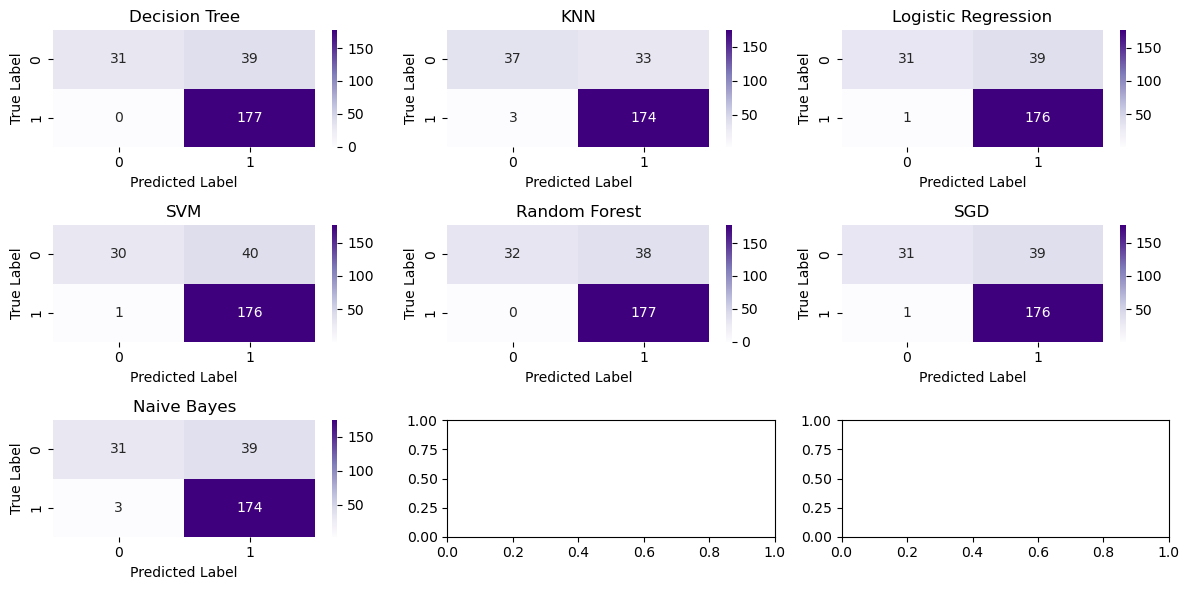

In [199]:
# Plot confusion matrices
def plot_confusion_matrices(results_1):
    fig, axes = plt.subplots(3, 3, figsize=(12, 6))
    axes = axes.flatten()
    
    for i, (model_name, result) in enumerate(results_1.items()):
        conf_matrix = result['Confusion Matrix']
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', ax=axes[i])
        axes[i].set_title(model_name)
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(results_1)

In [201]:
recall = []
precision = []
f1_score = []
train_accuracy = []
test_accuracy = []
training_time = []
testing_time = []

model_names = list(results_1.keys()) 

for (model_name, result) in results_1.items():
    recall.append(result['Classification Report']['weighted avg']['recall'])
    precision.append(result['Classification Report']['weighted avg']['precision'])
    f1_score.append(result['Classification Report']['weighted avg']['f1-score'])
    train_accuracy.append(result['Train Accuracy'])
    test_accuracy.append(result['Test Accuracy'])
    training_time.append(result['Training Time'])
    testing_time.append(result['Testing Time'])


print(f"{model_names}")
print(f"{precision}")
print(f"{f1_score}")
print(f"{recall}")
print(f"{train_accuracy}")
print(f"{test_accuracy}")   
print(f"{training_time}")  
print(f"{testing_time}")  

['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'Random Forest', 'SGD', 'Naive Bayes']
[0.8706140350877193, 0.864504488646365, 0.861155964598437, 0.8581544846400534, 0.873345259391771, 0.861155964598437, 0.8437857437552201]
[0.8194551074231569, 0.8400694700036805, 0.8157400612066688, 0.8101963949833187, 0.8249530581463355, 0.8157400612066688, 0.8083774525070072]
[0.8421052631578947, 0.854251012145749, 0.8380566801619433, 0.8340080971659919, 0.8461538461538461, 0.8380566801619433, 0.8299595141700404]
[0.8062241769958683, 0.8029588164734106, 0.8078368652538984, 0.809462881514061, 0.8045715047314408, 0.7964547514327602, 0.7931893909103025]
[0.8421052631578947, 0.854251012145749, 0.8380566801619433, 0.8340080971659919, 0.8461538461538461, 0.8380566801619433, 0.8299595141700404]
[0.33008456230163574, 0.1224508285522461, 0.9884219169616699, 2.0236430168151855, 0.641610860824585, 0.02844977378845215, 0.012856721878051758]
[0.014902591705322266, 0.04200553894042969, 0.007915258407592773

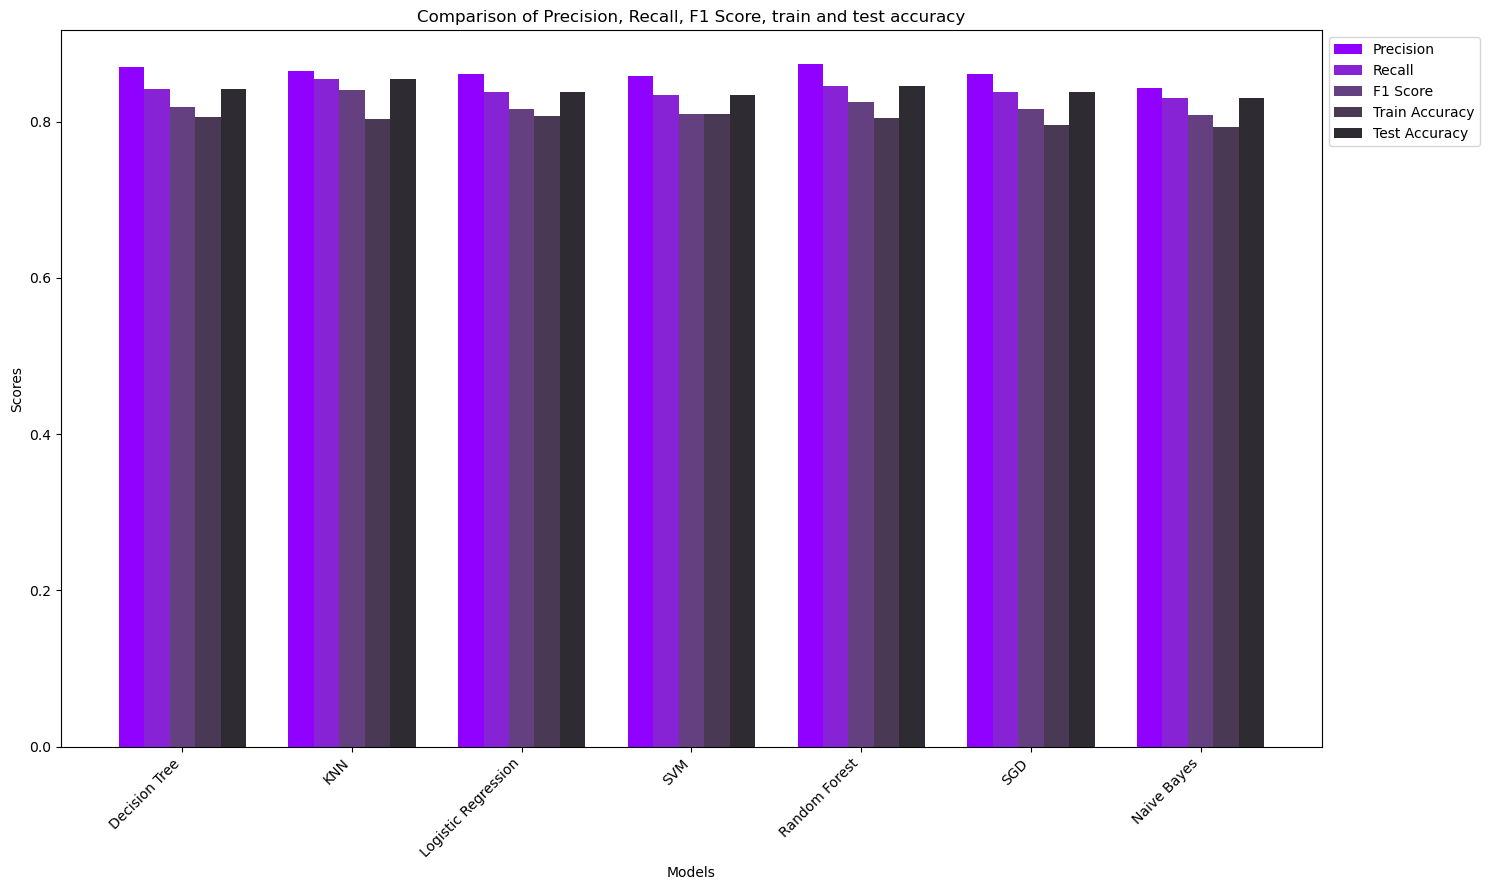

In [209]:
# Plot comparison of precision, recall, and f1-score
def plot_metrics_comparison(results_1):
    x = np.arange(len(model_names))
    width = 0.15
    colors = ['#9101FF', '#8823D5', '#644080', '#493955', '#2F2B33']
    
    fig, ax = plt.subplots(figsize=(15, 9))
    rects1 = ax.bar(x - width*2, precision, width, label='Precision', color=colors[0])
    rects2 = ax.bar(x - width, recall, width, label='Recall', color=colors[1])
    rects3 = ax.bar(x, f1_score, width, label='F1 Score', color=colors[2])
    rects4 = ax.bar(x + width, train_accuracy, width, label='Train Accuracy', color=colors[3])
    rects5 = ax.bar(x + width*2, test_accuracy, width, label='Test Accuracy', color=colors[4])
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Precision, Recall, F1 Score, train and test accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

plot_metrics_comparison(results_1)

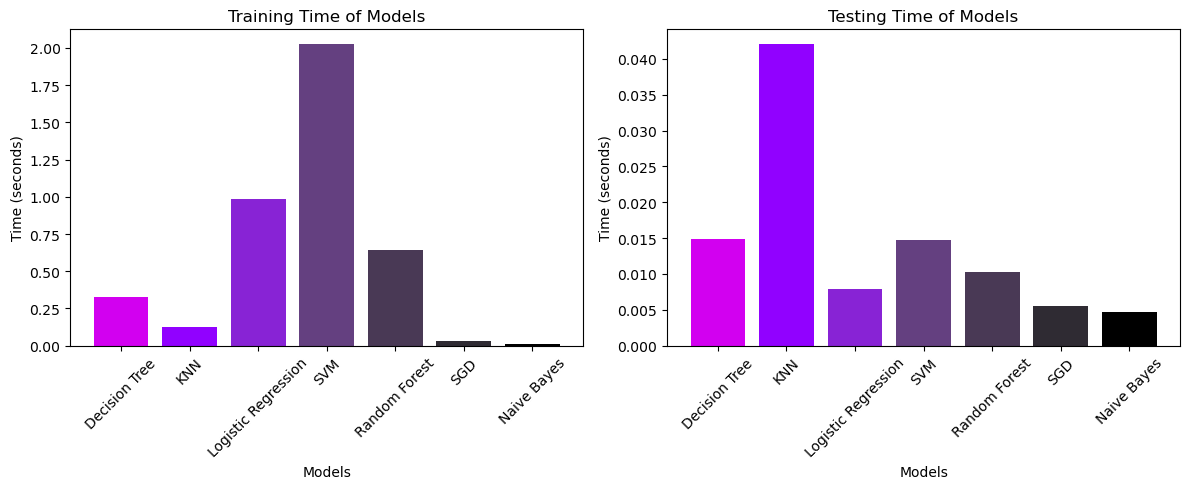

In [207]:
colors = ['#D200F0', '#9101FF', '#8823D5', '#644080', '#493955', '#2F2B33', "black"]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training time plot
for i, model in enumerate(model_names):
    axes[0].bar(model, training_time[i], color=colors[i])
axes[0].set_title('Training Time of Models')
axes[0].set_ylabel('Time (seconds)')
axes[0].set_xlabel('Models')
axes[0].tick_params(axis='x', rotation=45)

# Testing time plot
for i, model in enumerate(model_names):
    axes[1].bar(model, testing_time[i], color=colors[i])
axes[1].set_title('Testing Time of Models')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_xlabel('Models')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


## Fill Null Values Simple Imputer (Mode)

In [223]:
# Method 2: Simple Imputer (Mode)
from sklearn.impute import SimpleImputer, KNNImputer
df_simple_imputer = df.copy()
simple_imputer = SimpleImputer(strategy='most_frequent')
df_simple_imputer.iloc[:, :] = simple_imputer.fit_transform(df_simple_imputer)
df_simple_imputer.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

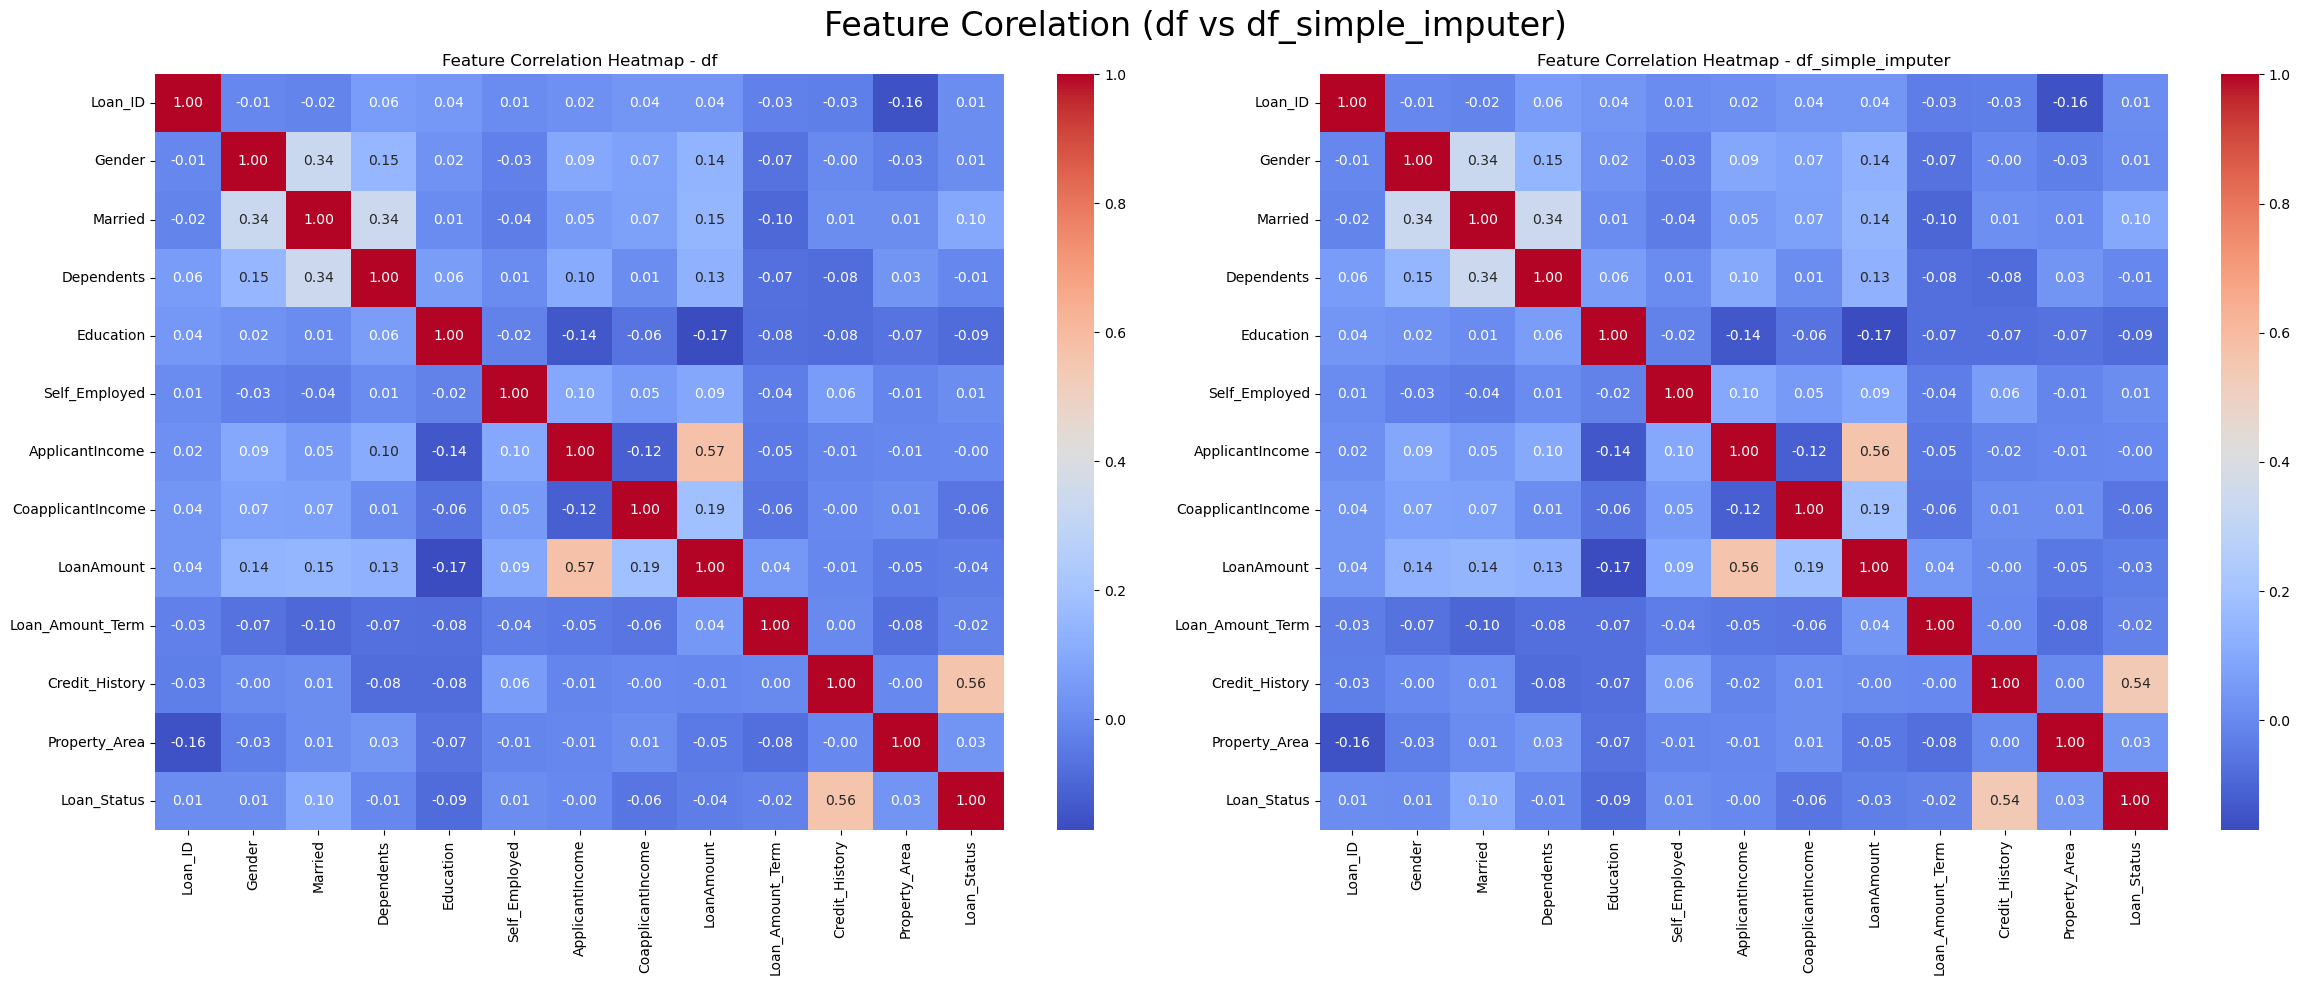

In [225]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_filled
sns.heatmap(df_simple_imputer.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_simple_imputer")

plt.suptitle("Feature Corelation (df vs df_simple_imputer)", fontsize=24)
plt.tight_layout()
plt.show()

In [227]:
# Method 2: Simple Imputer (Mode)
from sklearn.impute import SimpleImputer, KNNImputer
print(f"Test Data before filling null values: \n{df_test.isnull().sum()}")
df_simple_imputer_test = df_test.copy()
simple_imputer = SimpleImputer(strategy='most_frequent')
df_simple_imputer_test.iloc[:, :] = simple_imputer.fit_transform(df_simple_imputer_test)
df_simple_imputer_test.isnull().sum()
print(f"\nTest Data After filling null values: \n{df_filled_test.isnull().sum()}")

Test Data before filling null values: 
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Test Data After filling null values: 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [229]:
X_train_simple_imputer = df_simple_imputer.drop(columns=[target_col])
y_train_simple_imputer = df_simple_imputer[target_col]
X_test_simple_imputer = df_simple_imputer_test

# Standardization
scaler = StandardScaler()
X_train_scaled_simple_imputer = scaler.fit_transform(X_train_simple_imputer)
X_test_scaled_simple_imputer = scaler.fit_transform(X_test_simple_imputer)

In [233]:
print(f"X_train_scaled_simple_imputer {X_train_scaled_simple_imputer.shape} \nX_test_scaled_simple_imputer {X_test_scaled_simple_imputer.shape} \ny_train_simple_imputer{y_train_simple_imputer.shape}")

X_train_scaled_simple_imputer (614, 12) 
X_test_scaled_simple_imputer (367, 12) 
y_train_simple_imputer(614,)


In [235]:
results_2 = {}
trained_models_2 = {}

In [245]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled_simple_imputer, _, y_train_sampled_simple_imputer, _ = train_test_split(
    X_train_scaled_simple_imputer, y_train_simple_imputer, test_size=len(X_test_scaled_simple_imputer) / len(X_train_scaled_simple_imputer), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    # Training models
    start_time = time.time()
    print(f"Training {model_name}...")
    
    grid_search_simple_imputer = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search_simple_imputer.fit(X_train_scaled_simple_imputer, y_train_simple_imputer)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    best_model_simple_imputer = grid_search_simple_imputer.best_estimator_
    trained_models_2[model_name] = best_model_simple_imputer
    joblib.dump(best_model_simple_imputer, f'SimpleImputer_{model_name.replace(" ", "_")}_model.pkl')

    # **Testing (Predicting on sampled training data)**
    start_time_test = time.time()
    y_pred_sampled_simple_imputer = best_model.predict(X_train_sampled_simple_imputer)  # Predict on sampled subset
    test_accuracy = accuracy_score(y_train_sampled_simple_imputer, y_pred_sampled_simple_imputer)  # Compare with actual labels

    report_simple_imputer = classification_report(y_train_sampled_simple_imputer, y_pred_sampled_simple_imputer, output_dict=True)
    conf_matrix_simple_imputer = confusion_matrix(y_train_sampled_simple_imputer, y_pred_sampled_simple_imputer)
    
    end_time_test = time.time()

    # Store results
    results_2[model_name] = {
        'Best Params': grid_search_simple_imputer.best_params_,
        'Train Accuracy': grid_search_simple_imputer.best_score_,
        'Test Accuracy': test_accuracy,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report_simple_imputer,
        'Confusion Matrix': conf_matrix_simple_imputer
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

# **Final Predictions on X_test (for submission)**
y_test_predicted_final_simple_imputer = best_model.predict(X_test_scaled_simple_imputer)

# Save predictions for reference
np.save("predicted_y_test_simple_imputer.npy", y_test_predicted_final_simple_imputer)
pd.DataFrame(y_test_predicted_final_simple_imputer, columns=["Predicted_Label"]).to_csv("final_predictions_simple_imputer.csv", index=False)

print("Training and evaluation complete. Results and predictions saved.")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 0.03973722457885742 seconds and tested in 0.006639003753662109 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.03721427917480469 seconds and tested in 0.0065190792083740234 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.04264426231384277 seconds and tested in 0.006525516510009766 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.11124420166015625 seconds and tested in 0.007508516311645508 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.5197281837463379 seconds and tested in 0.0055255889892578125 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.01807236671447754 s

In [247]:
for model, result in results_2.items():
    print(f"\nModel: {model}")
    for key, value in result.items():
        print(f"{key}: {value}")


Model: Decision Tree
Best Params: {'max_depth': 3, 'min_samples_split': 2}
Train Accuracy: 0.8062241769958683
Test Accuracy: 0.8299595141700404
Training Time: 0.03973722457885742
Testing Time: 0.006639003753662109
Classification Report: {'0': {'precision': 0.9117647058823529, 'recall': 0.44285714285714284, 'f1-score': 0.5961538461538461, 'support': 70.0}, '1': {'precision': 0.8169014084507042, 'recall': 0.9830508474576272, 'f1-score': 0.8923076923076924, 'support': 177.0}, 'accuracy': 0.8299595141700404, 'macro avg': {'precision': 0.8643330571665286, 'recall': 0.712953995157385, 'f1-score': 0.7442307692307693, 'support': 247.0}, 'weighted avg': {'precision': 0.8437857437552201, 'recall': 0.8299595141700404, 'f1-score': 0.8083774525070072, 'support': 247.0}}
Confusion Matrix: [[ 31  39]
 [  3 174]]

Model: KNN
Best Params: {'n_neighbors': 7}
Train Accuracy: 0.8029588164734106
Test Accuracy: 0.8299595141700404
Training Time: 0.03721427917480469
Testing Time: 0.0065190792083740234
Classi

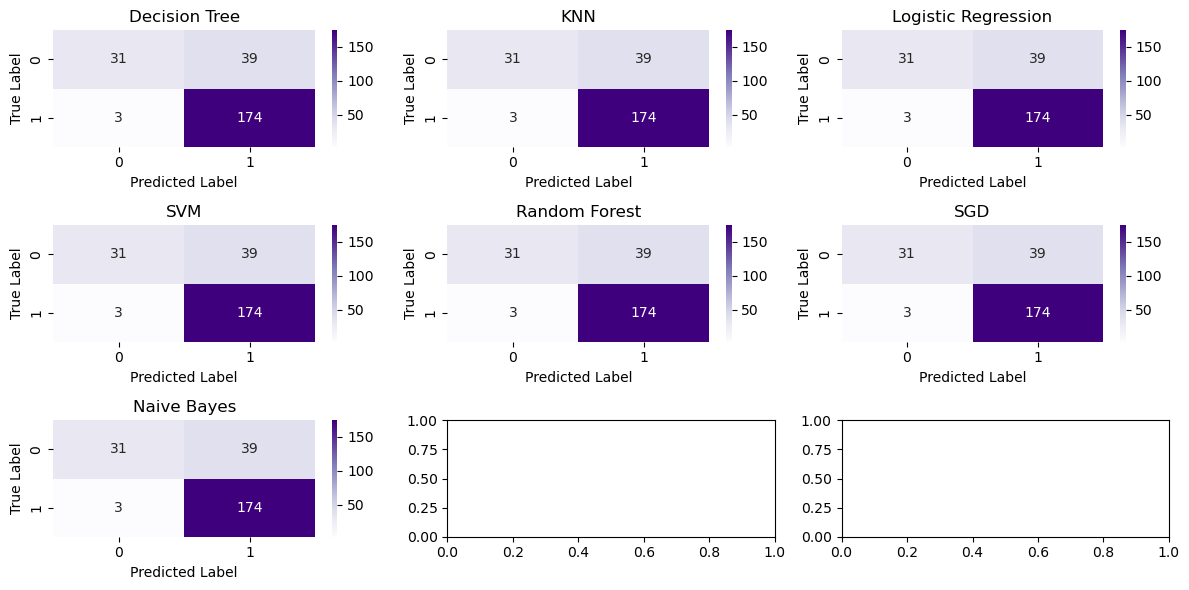

In [249]:
# Plot confusion matrices
def plot_confusion_matrices(results_2):
    fig, axes = plt.subplots(3, 3, figsize=(12, 6))
    axes = axes.flatten()
    
    for i, (model_name, result) in enumerate(results_2.items()):
        cm = result['Confusion Matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', ax=axes[i])
        axes[i].set_title(model_name)
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(results_2)

In [251]:
recall_simple_imputer = []
precision_simple_imputer = []
f1_score_simple_imputer = []
train_accuracy_simple_imputer = []
test_accuracy_simple_imputer = []
training_time_simple_imputer = []
testing_time_simple_imputer = []

for (model_name, result) in results_2.items():
    recall_simple_imputer.append(result['Classification Report']['weighted avg']['recall'])
    precision_simple_imputer.append(result['Classification Report']['weighted avg']['precision'])
    f1_score_simple_imputer.append(result['Classification Report']['weighted avg']['f1-score'])
    train_accuracy_simple_imputer.append(result['Train Accuracy'])
    test_accuracy_simple_imputer.append(result['Test Accuracy'])
    training_time_simple_imputer.append(result['Training Time'])
    testing_time_simple_imputer.append(result['Testing Time'])


print(f"{model_names}")
print(f"{precision_simple_imputer}")
print(f"{f1_score_simple_imputer}")
print(f"{recall_simple_imputer}")
print(f"{train_accuracy_simple_imputer}")
print(f"{test_accuracy_simple_imputer}")   
print(f"{training_time_simple_imputer}")  
print(f"{testing_time_simple_imputer}")  

['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'Random Forest', 'SGD', 'Naive Bayes']
[0.8437857437552201, 0.8437857437552201, 0.8437857437552201, 0.8437857437552201, 0.8437857437552201, 0.8437857437552201, 0.8437857437552201]
[0.8083774525070072, 0.8083774525070072, 0.8083774525070072, 0.8083774525070072, 0.8083774525070072, 0.8083774525070072, 0.8083774525070072]
[0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404]
[0.8062241769958683, 0.8029588164734106, 0.8078368652538984, 0.809462881514061, 0.8045715047314408, 0.7964547514327602, 0.7931893909103025]
[0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404, 0.8299595141700404]
[0.03973722457885742, 0.03721427917480469, 0.04264426231384277, 0.11124420166015625, 0.5197281837463379, 0.01807236671447754, 0.014693737030029297]
[0.006639003753662109, 0.0065190792083740234, 0.006525

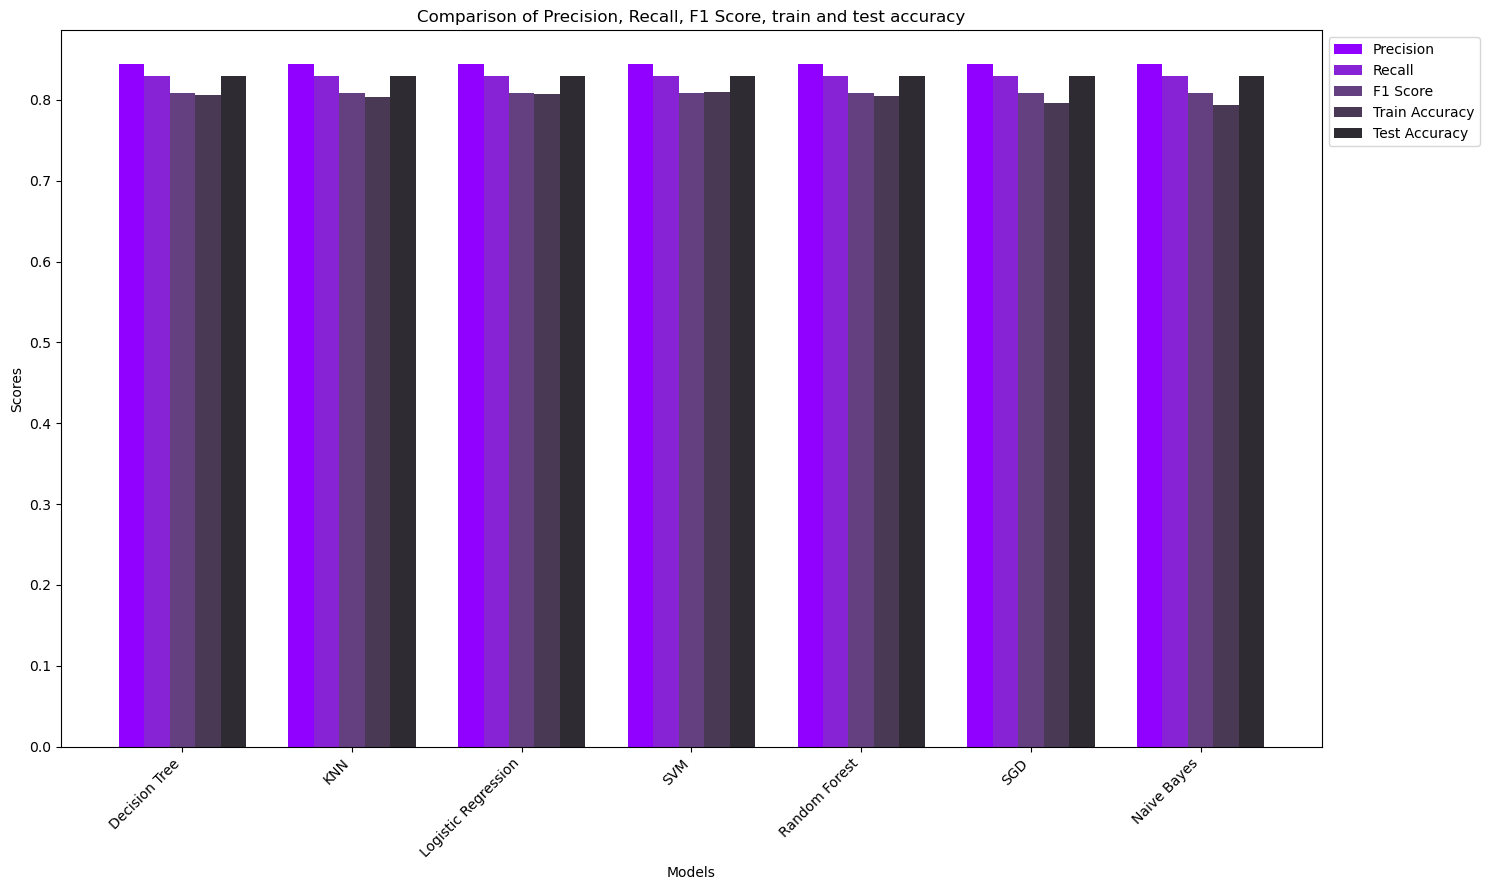

In [253]:
# Plot comparison of precision, recall, and f1-score
def plot_metrics_comparison(results_2):
    x = np.arange(len(model_names))
    width = 0.15
    colors = ['#9101FF', '#8823D5', '#644080', '#493955', '#2F2B33']
    
    fig, ax = plt.subplots(figsize=(15, 9))
    rects1 = ax.bar(x - width*2, precision_simple_imputer, width, label='Precision', color=colors[0])
    rects2 = ax.bar(x - width, recall_simple_imputer, width, label='Recall', color=colors[1])
    rects3 = ax.bar(x, f1_score_simple_imputer, width, label='F1 Score', color=colors[2])
    rects4 = ax.bar(x + width, train_accuracy_simple_imputer, width, label='Train Accuracy', color=colors[3])
    rects5 = ax.bar(x + width*2, test_accuracy_simple_imputer, width, label='Test Accuracy', color=colors[4])
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Precision, Recall, F1 Score, train and test accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

plot_metrics_comparison(results_2)

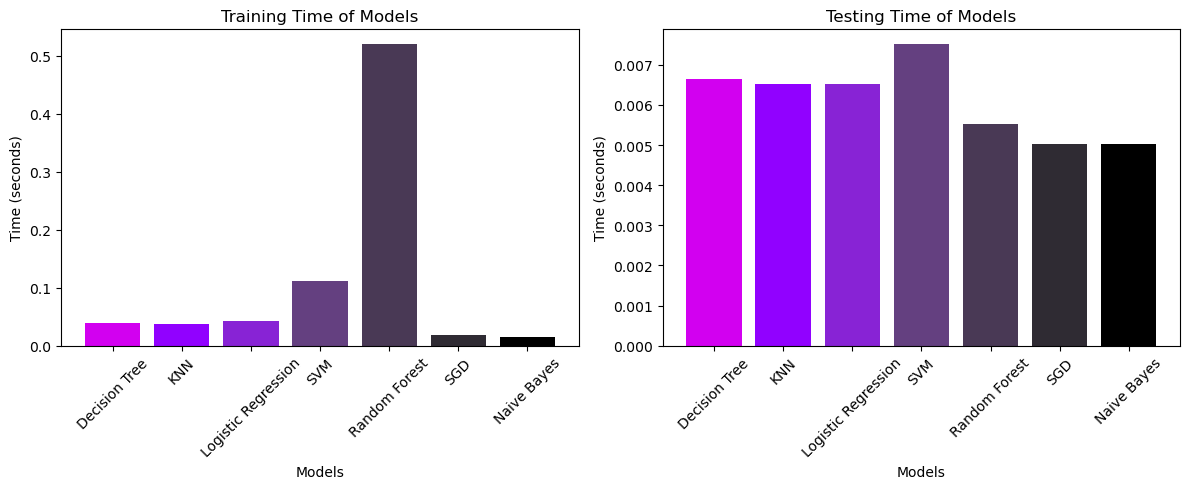

In [255]:
colors = ['#D200F0', '#9101FF', '#8823D5', '#644080', '#493955', '#2F2B33', "black"]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training time plot
for i, model in enumerate(model_names):
    axes[0].bar(model, training_time_simple_imputer[i], color=colors[i])
axes[0].set_title('Training Time of Models')
axes[0].set_ylabel('Time (seconds)')
axes[0].set_xlabel('Models')
axes[0].tick_params(axis='x', rotation=45)

# Testing time plot
for i, model in enumerate(model_names):
    axes[1].bar(model, testing_time_simple_imputer[i], color=colors[i])
axes[1].set_title('Testing Time of Models')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_xlabel('Models')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


## Fill Null Values with Multivariate Imputer (KNN Imputer)

In [257]:
# Method 3: Multivariate Imputer (KNN Imputer)
df_multi_imputer = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer)
df_multi_imputer.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

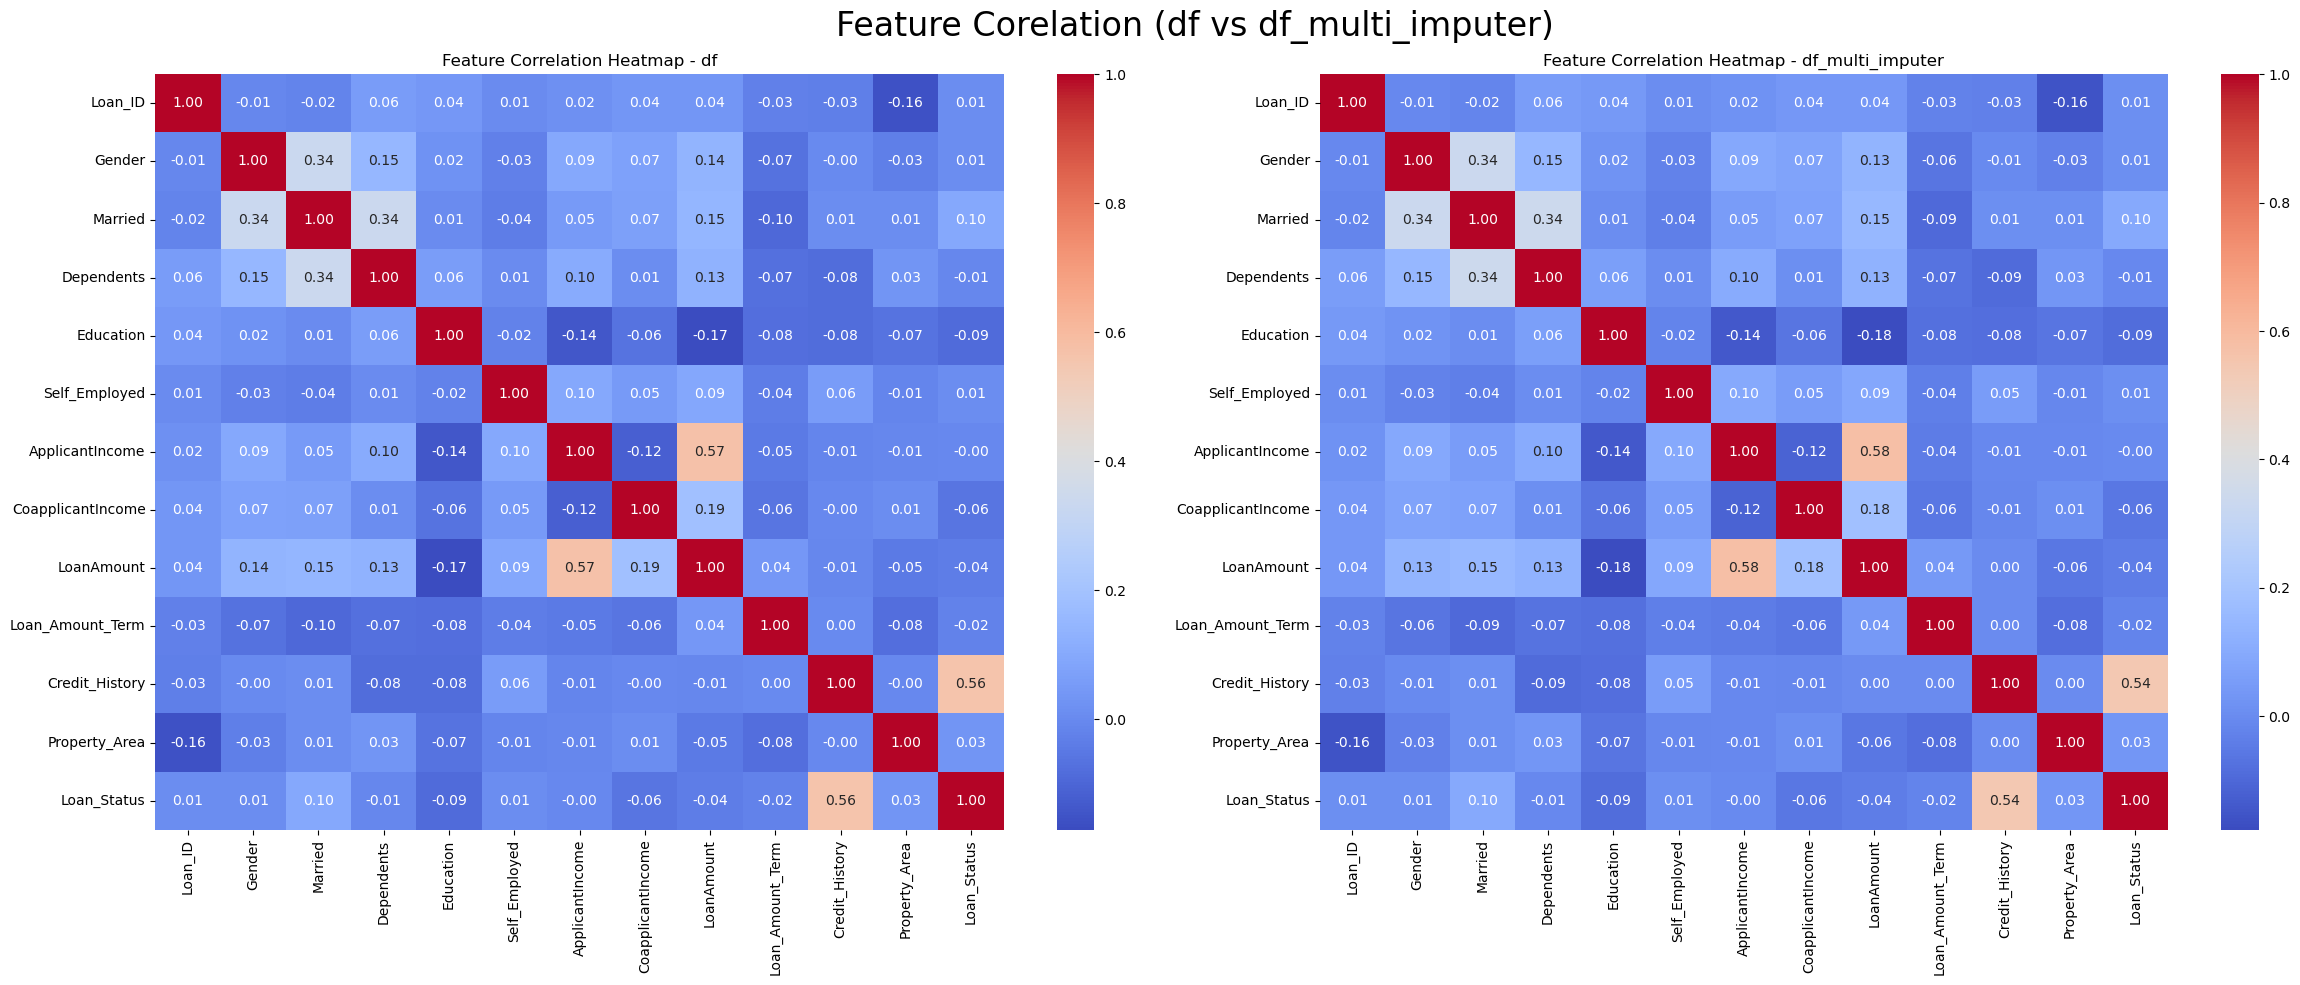

In [74]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Heatmap for df
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0])
axes[0].set_title("Feature Correlation Heatmap - df")

# Heatmap for df_multi_imputer
sns.heatmap(df_multi_imputer.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
axes[1].set_title("Feature Correlation Heatmap - df_multi_imputer")

plt.suptitle("Feature Corelation (df vs df_multi_imputer)", fontsize=24)
plt.tight_layout()
plt.show()

In [259]:
# Method 2: Simple Imputer (Mode)
from sklearn.impute import SimpleImputer, KNNImputer
print(f"Test Data before filling null values: \n{df_test.isnull().sum()}")
df_multi_imputer_test = df_test.copy()

knn_imputer = KNNImputer(n_neighbors=5)
df_multi_imputer_test.iloc[:, :] = knn_imputer.fit_transform(df_multi_imputer_test)

df_multi_imputer_test.isnull().sum()
print(f"\nTest Data After filling null values: \n{df_multi_imputer_test.isnull().sum()}")

Test Data before filling null values: 
Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Test Data After filling null values: 
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [263]:
X_train_multi_imputer = df_multi_imputer.drop(columns=[target_col])
y_train_multi_imputer = df_multi_imputer[target_col]
X_test_multi_imputer = df_multi_imputer_test

# Standardization
scaler = StandardScaler()
X_train_scaled_multi_imputer = scaler.fit_transform(X_train_multi_imputer)
X_test_scaled_multi_imputer = scaler.fit_transform(X_test_multi_imputer)

In [265]:
print(f"X_train_scaled_multi_imputer {X_train_scaled_multi_imputer.shape} \nX_test_scaled_multi_imputer {X_test_scaled_multi_imputer.shape} \ny_train_multi_imputer{y_train_multi_imputer.shape}")

X_train_scaled_multi_imputer (614, 12) 
X_test_scaled_multi_imputer (367, 12) 
y_train_multi_imputer(614,)


In [267]:
results_3 = {}
trained_models_3 = {}

In [269]:
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

RANDOM_SEED = 17

# Step 1: Sample a subset from training data (same size as X_test)
X_train_sampled_multi_imputer, _, y_train_sampled_multi_imputer, _ = train_test_split(
    X_train_scaled_multi_imputer, y_train_multi_imputer, test_size=len(X_test_scaled_multi_imputer) / len(X_train_scaled_multi_imputer), random_state=RANDOM_SEED
)

for model_name, (model, params) in models.items():
    # Training models
    start_time = time.time()
    print(f"Training {model_name}...")
    
    grid_search_multi_imputer = GridSearchCV(model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
    grid_search_multi_imputer.fit(X_train_scaled_multi_imputer, y_train_multi_imputer)
    
    end_time = time.time()

    # Best model found by GridSearchCV
    best_model_multi_imputer = grid_search_multi_imputer.best_estimator_
    trained_models_3[model_name] = best_model_multi_imputer
    joblib.dump(best_model_multi_imputer, f'MultiImputer_{model_name.replace(" ", "_")}_model.pkl')

    # **Testing (Predicting on sampled training data)**
    start_time_test = time.time()
    y_pred_sampled_multi_imputer = best_model_multi_imputer.predict(X_train_sampled_multi_imputer)  # Predict on sampled subset
    test_accuracy_multi_imputer = accuracy_score(y_train_sampled_multi_imputer, y_pred_sampled_multi_imputer)  # Compare with actual labels

    report_multi_imputer = classification_report(y_train_sampled_multi_imputer, y_pred_sampled_multi_imputer, output_dict=True)
    conf_matrix_multi_imputer = confusion_matrix(y_train_sampled_multi_imputer, y_pred_sampled_multi_imputer)
    
    end_time_test = time.time()

    # Store results
    results_3[model_name] = {
        'Best Params': grid_search_multi_imputer.best_params_,
        'Train Accuracy': grid_search_multi_imputer.best_score_,
        'Test Accuracy': test_accuracy_multi_imputer,
        'Training Time': end_time - start_time,
        'Testing Time': end_time_test - start_time_test,
        'Classification Report': report_multi_imputer,
        'Confusion Matrix': conf_matrix_multi_imputer
    }

    print(f"{model_name} trained in {end_time - start_time} seconds and tested in {end_time_test - start_time_test} seconds\n")

# **Final Predictions on X_test (for submission)**
y_test_predicted_final_multi_imputer = best_model_multi_imputer.predict(X_test_scaled_multi_imputer)

# Save predictions for reference
np.save("predicted_y_test_multi_imputer.npy", y_test_predicted_final_multi_imputer)
pd.DataFrame(y_test_predicted_final_multi_imputer, columns=["Predicted_Label"]).to_csv("final_predictions_multi_imputer.csv", index=False)

print("Training and evaluation complete. Results and predictions saved.")


Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Decision Tree trained in 3.169682502746582 seconds and tested in 0.00842428207397461 seconds

Training KNN...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
KNN trained in 0.049189090728759766 seconds and tested in 0.017613649368286133 seconds

Training Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logistic Regression trained in 0.048441171646118164 seconds and tested in 0.009511232376098633 seconds

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM trained in 0.13341426849365234 seconds and tested in 0.009009599685668945 seconds

Training Random Forest...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Random Forest trained in 0.6572396755218506 seconds and tested in 0.012533426284790039 seconds

Training SGD...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
SGD trained in 0.02939772605895996 seco

In [271]:
for model, result in results_3.items():
    print(f"\nModel: {model}")
    for key, value in result.items():
        print(f"{key}: {value}")


Model: Decision Tree
Best Params: {'max_depth': 3, 'min_samples_split': 2}
Train Accuracy: 0.7997067839530854
Test Accuracy: 0.8421052631578947
Training Time: 3.169682502746582
Testing Time: 0.00842428207397461
Classification Report: {'0': {'precision': 1.0, 'recall': 0.44285714285714284, 'f1-score': 0.6138613861386139, 'support': 70.0}, '1': {'precision': 0.8194444444444444, 'recall': 1.0, 'f1-score': 0.9007633587786259, 'support': 177.0}, 'accuracy': 0.8421052631578947, 'macro avg': {'precision': 0.9097222222222222, 'recall': 0.7214285714285714, 'f1-score': 0.7573123724586199, 'support': 247.0}, 'weighted avg': {'precision': 0.8706140350877193, 'recall': 0.8421052631578947, 'f1-score': 0.8194551074231569, 'support': 247.0}}
Confusion Matrix: [[ 31  39]
 [  0 177]]

Model: KNN
Best Params: {'n_neighbors': 7}
Train Accuracy: 0.799693455950953
Test Accuracy: 0.8582995951417004
Training Time: 0.049189090728759766
Testing Time: 0.017613649368286133
Classification Report: {'0': {'precisio

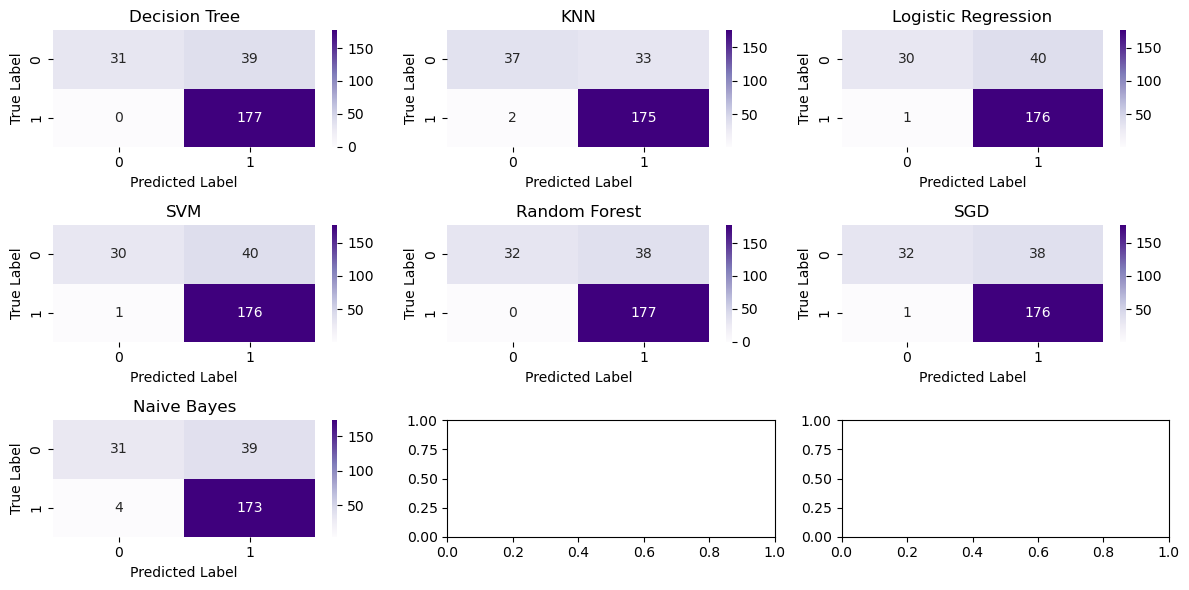

In [273]:
# Plot confusion matrices
def plot_confusion_matrices(results_3):
    fig, axes = plt.subplots(3, 3, figsize=(12, 6))
    axes = axes.flatten()
    
    for i, (model_name, result) in enumerate(results_3.items()):
        cmm = result['Confusion Matrix']
        sns.heatmap(cmm, annot=True, fmt='d', cmap='Purples', ax=axes[i])
        axes[i].set_title(model_name)
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(results_3)

In [277]:
recall_multi_imputer = []
precision_multi_imputer = []
f1_score_multi_imputer = []
train_accuracy_multi_imputer = []
test_accuracy_multi_imputer = []
training_time_multi_imputer = []
testing_time_multi_imputer = []

model_names = list(results_1.keys()) 

for (model_name, result) in results_3.items():
    recall_multi_imputer.append(result['Classification Report']['weighted avg']['recall'])
    precision_multi_imputer.append(result['Classification Report']['weighted avg']['precision'])
    f1_score_multi_imputer.append(result['Classification Report']['weighted avg']['f1-score'])
    train_accuracy_multi_imputer.append(result['Train Accuracy'])
    test_accuracy_multi_imputer.append(result['Test Accuracy'])
    training_time_multi_imputer.append(result['Training Time'])
    testing_time_multi_imputer.append(result['Testing Time'])


print(f"{model_names}")
print(f"{precision_multi_imputer}")
print(f"{f1_score_multi_imputer}")
print(f"{recall_multi_imputer}")
print(f"{train_accuracy_multi_imputer}")
print(f"{test_accuracy_multi_imputer}")   
print(f"{training_time_multi_imputer}")  
print(f"{testing_time_multi_imputer}")  

['Decision Tree', 'KNN', 'Logistic Regression', 'SVM', 'Random Forest', 'SGD', 'Naive Bayes']
[0.8706140350877193, 0.8717754074535451, 0.8581544846400534, 0.8581544846400534, 0.873345259391771, 0.8641655114847442, 0.8357841264991216]
[0.8194551074231569, 0.8438543590644025, 0.8101963949833187, 0.8101963949833187, 0.8249530581463355, 0.8212162517136334, 0.8047278568182371]
[0.8421052631578947, 0.8582995951417004, 0.8340080971659919, 0.8340080971659919, 0.8461538461538461, 0.8421052631578947, 0.8259109311740891]
[0.7997067839530854, 0.799693455950953, 0.8061975209916034, 0.8110888977742234, 0.8045848327335733, 0.7801812608290019, 0.7915500466480074]
[0.8421052631578947, 0.8582995951417004, 0.8340080971659919, 0.8340080971659919, 0.8461538461538461, 0.8421052631578947, 0.8259109311740891]
[3.169682502746582, 0.049189090728759766, 0.048441171646118164, 0.13341426849365234, 0.6572396755218506, 0.02939772605895996, 0.014598608016967773]
[0.00842428207397461, 0.017613649368286133, 0.009511232

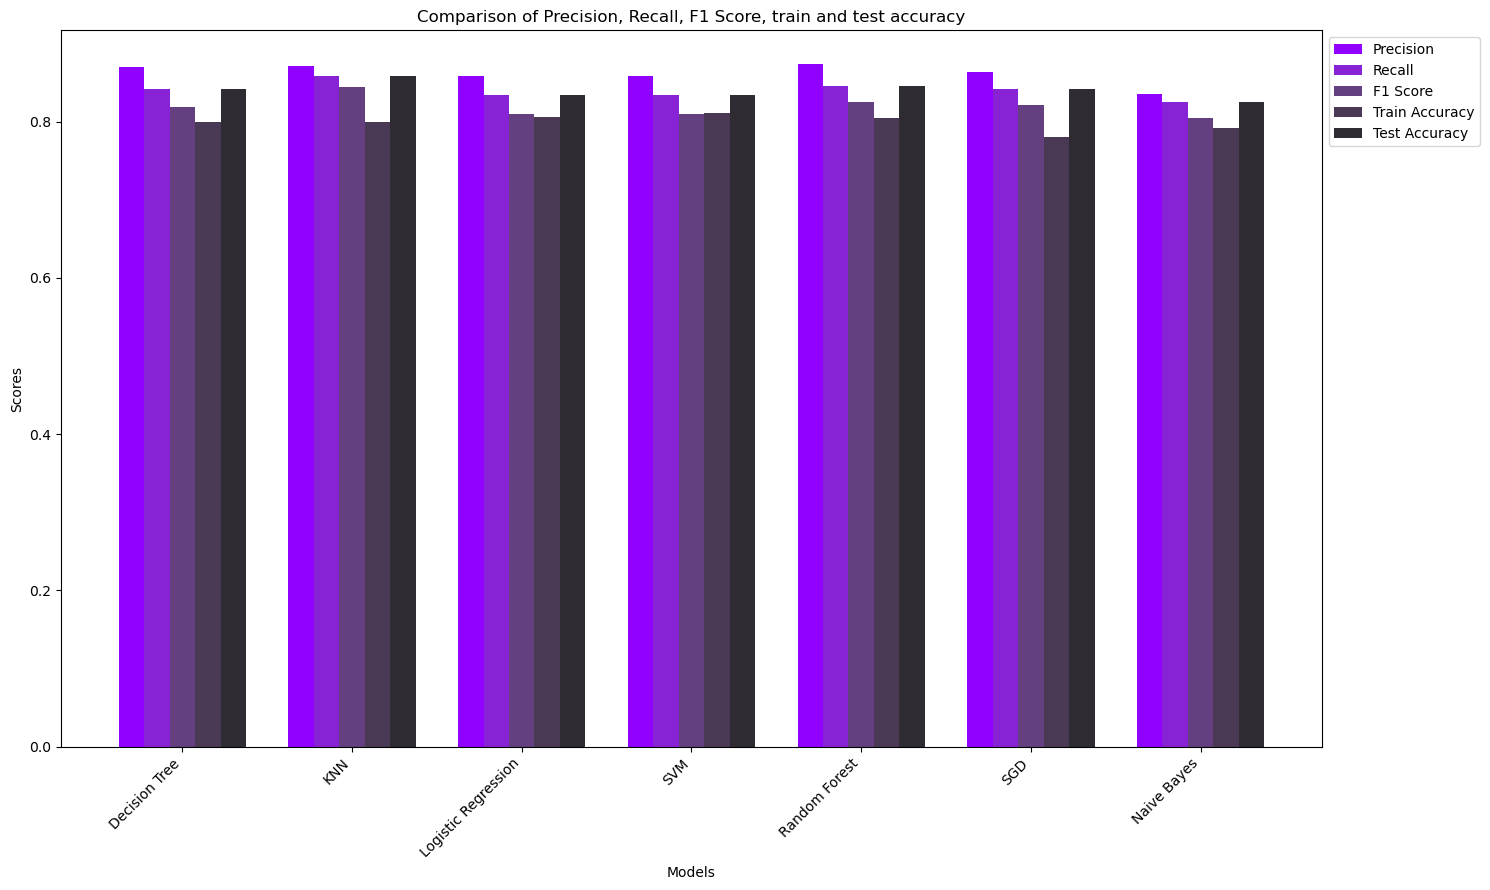

In [279]:
# Plot comparison of precision, recall, and f1-score
def plot_metrics_comparison(results_3):
    x = np.arange(len(model_names))
    width = 0.15
    colors = ['#9101FF', '#8823D5', '#644080', '#493955', '#2F2B33']
    
    fig, ax = plt.subplots(figsize=(15, 9))
    rects1 = ax.bar(x - width*2, precision_multi_imputer, width, label='Precision', color=colors[0])
    rects2 = ax.bar(x - width, recall_multi_imputer, width, label='Recall', color=colors[1])
    rects3 = ax.bar(x, f1_score_multi_imputer, width, label='F1 Score', color=colors[2])
    rects4 = ax.bar(x + width, train_accuracy_multi_imputer, width, label='Train Accuracy', color=colors[3])
    rects5 = ax.bar(x + width*2, test_accuracy_multi_imputer, width, label='Test Accuracy', color=colors[4])
    
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Precision, Recall, F1 Score, train and test accuracy')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout()
    plt.show()

plot_metrics_comparison(results_3)

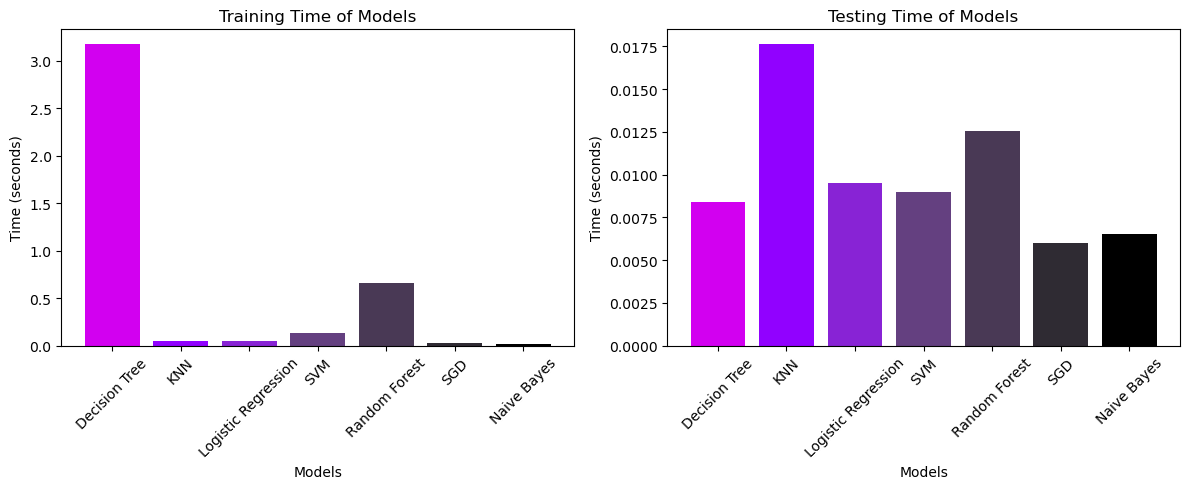

In [281]:
colors = ['#D200F0', '#9101FF', '#8823D5', '#644080', '#493955', '#2F2B33', "black"]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training time plot
for i, model in enumerate(model_names):
    axes[0].bar(model, training_time_multi_imputer[i], color=colors[i])
axes[0].set_title('Training Time of Models')
axes[0].set_ylabel('Time (seconds)')
axes[0].set_xlabel('Models')
axes[0].tick_params(axis='x', rotation=45)

# Testing time plot
for i, model in enumerate(model_names):
    axes[1].bar(model, testing_time_multi_imputer[i], color=colors[i])
axes[1].set_title('Testing Time of Models')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_xlabel('Models')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()
